<a href="https://colab.research.google.com/github/uparlatan/PhotonicsLab/blob/main/Train_Cell_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import os

# 0) Force GPU 0
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['WANDB_MODE'] = 'disabled'

# 1) Change into the YOLOv5 repo
%cd /content/gdrive/MyDrive/Labsan/Tricell/yolov5

# 2) Install dependencies
!pip install -qr requirements.txt


# 3) Launch training directly off Drive
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data /content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml \
  --cfg yolov5n_gray.yaml \
  --weights '' \
  --hyp /content/gdrive/MyDrive/Labsan/Tricell/hyp.yaml \
  --workers 2


Görüntülenen çıkış son 5000 satıra kısaltıldı.
      47/49      5.17G   0.002387   0.002019     0.0196         48        640:  85% 987/1155 [02:12<00:23,  7.18it/s]/content/gdrive/MyDrive/Labsan/Tricell/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      47/49      5.17G   0.002387   0.002019    0.01959         50        640:  86% 989/1155 [02:13<00:23,  7.00it/s]/content/gdrive/MyDrive/Labsan/Tricell/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      47/49      5.17G   0.002387    0.00202    0.01959         49        640:  86% 989/1155 [02:13<00:23,  7.00it/s]/content/gdrive/MyDrive/Labsan/Tricell/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda'

In [ ]:
#---LLM assisted learning
# === EDIT THESE ===
DIR_YOLO = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5"  # your YOLOv5 repo on Drive
DATA_YAML = "/content/gdrive/MyDrive/Labsan/Tricell/data_config_test.yaml"
CKPT      = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt"  # or wherever best.pt is

# Where to save the final CSV
OUT_CSV   = "/content/gdrive/MyDrive/Labsan/Tricell/LLMOps/detections.csv"





In [ ]:
%cd {DIR_YOLO}
!pip install -qr requirements.txt pillow pandas pyyaml


/content/gdrive/MyDrive/Labsan/Tricell/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.5 MB/s eta 0:00:00


In [ ]:
import os, yaml, glob

with open(DATA_YAML, "r") as f:
    ds = yaml.safe_load(f)

def expand_source(entry):
    # entry can be: a folder path, a single image, or a .txt list of images
    entry = str(entry)
    if entry.endswith(".txt"):
        with open(entry) as fh:
            ims = [ln.strip() for ln in fh if ln.strip()]
        # detect.py can take a .txt file directly, but we’ll just return the .txt path itself
        return [entry]
    elif os.path.isdir(entry):
        # return the folder; detect.py will recurse
        return [entry]
    else:
        # could be a glob or a single file
        return [entry]

sources = []
for split in ["train","val","test"]:
    if split in ds and ds[split]:
        sources += expand_source(ds[split])

# Dedup while preserving order
seen=set(); SOURCES=[]
for s in sources:
    if s not in seen:
        SOURCES.append(s); seen.add(s)

SOURCES


['/content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample']

In [ ]:
# Check current Torch
import torch, sys
print("Before:", torch.__version__)

# Install Torch 2.5.1 CUDA 12.1 wheels (matches Colab)
!pip install -q torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu121

import os; os._exit(0)  # <-- restarts the Colab runtime; run your cells again after it reconnects


Before: 2.8.0+cu126
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 12.9 MB/s eta 0:00:00
     ━━━━━━

In [ ]:
import torch, sys
print("Before:", torch.__version__)

Before: 2.5.1+cu121


In [ ]:
# ===== Detect + CSV in one go (GPU + grayscale-friendly detect.py assumed) =====
import os, glob, yaml, pandas as pd
from PIL import Image

# --- EDIT PATHS ---
DIR_YOLO = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5"
CKPT     = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt"
SRC      = "/content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample"
RUN_NAME = "exp_llmops_gray"   # detect run name
DATA_YAML= "/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"
OUT_CSV  = "/content/gdrive/MyDrive/Labsan/Tricell/LLMOps/detections.csv"

# --- 1) Run detection (saves TXT labels with confidences) ---
%cd {DIR_YOLO}
!pip install -qr requirements.txt pillow pandas pyyaml >/dev/null
!python detect.py --weights "{CKPT}" --source "{SRC}" \
  --device 0 --half --save-txt --save-conf --name "{RUN_NAME}" --exist-ok

# --- 2) Build a fast stem->image map just under SRC (no full-drive search) ---
IMG_EXTS = (".png",".jpg",".jpeg",".tif",".tiff",".bmp")
stem2path = {}
dupes = set()
for root, _, files in os.walk(SRC):
    for fn in files:
        if os.path.splitext(fn.lower())[1] in IMG_EXTS:
            stem = os.path.splitext(fn)[0]
            full = os.path.join(root, fn)
            if stem in stem2path:
                dupes.add(stem)  # same filename appears in multiple subfolders
            else:
                stem2path[stem] = full
if dupes:
    print(f"[Warn] {len(dupes)} duplicate stems found under SRC; using the first seen path for those names.")

# --- 3) Optional: class-name mapping from your data yaml ---
names = None
try:
    with open(DATA_YAML, "r") as f:
        d = yaml.safe_load(f)
    names = d.get("names")
    if isinstance(names, dict):
        names = [names[k] for k in sorted(names)]
except Exception:
    pass

# --- 4) Convert this run's TXTs -> detections.csv (pixels) ---
labels_dir = f"{DIR_YOLO}/runs/detect/{RUN_NAME}/labels"
txts = sorted(glob.glob(os.path.join(labels_dir, "*.txt")))
if not txts:
    raise SystemExit(f"No .txt labels found in {labels_dir}. Did detect run and save labels?")

rows, missing = [], 0
for tf in txts:
    stem = os.path.splitext(os.path.basename(tf))[0]
    img_path = stem2path.get(stem)
    if not img_path:
        missing += 1
        continue
    # Get image size (fast: PIL only reads header)
    with Image.open(img_path) as im:
        W, H = im.size

    with open(tf, "r") as f:
        for line in f:
            ps = line.strip().split()
            if len(ps) < 5:
                continue
            cls_id = int(float(ps[0]))
            cx, cy, ww, hh = map(float, ps[1:5])     # normalized
            conf = float(ps[5]) if len(ps) >= 6 else 1.0
            x = (cx - ww/2) * W
            y = (cy - hh/2) * H
            w = ww * W
            h = hh * H
            klass = names[cls_id] if names and 0 <= cls_id < len(names) else str(cls_id)
            rows.append({
                "image_path": img_path,
                "class": klass,
                "conf": conf,
                "x": x, "y": y, "w": w, "h": h,
                "width": W, "height": H
            })

os.makedirs(os.path.dirname(OUT_CSV) or ".", exist_ok=True)
pd.DataFrame(rows).to_csv(OUT_CSV, index=False)
print(f"[OK] wrote {len(rows)} rows -> {OUT_CSV}")
if missing:
    print(f"[Note] {missing} label files had no matching image in SRC (likely duplicate stems in different folders).")
print(f"Labels read from: {labels_dir}")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
image 3462/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9259.png: 640x640 1 RBC, 9.5ms
image 3463/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9262.png: 640x640 1 RBC, 6.2ms
image 3464/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9265.png: 640x640 1 RBC, 6.6ms
image 3465/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9269.png: 640x640 1 RBC, 7.0ms
image 3466/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9275.png: 640x640 1 RBC, 7.0ms
image 3467/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_928.png: 640x640 1 RBC, 7.3ms
image 3468/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9283.png: 640x640 1 RBC, 6.7ms
image 3469/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9285.png: 640x640 1 RBC, 6.3ms
image 3470/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9287.png: 640x640 1 RBC, 6.4ms


In [ ]:
# Where the LLM-Ops kit lives (change if different)
KIT = "/content/yolo_urine_llm_ops"

# If you don't have the kit folder yet, create it and drop in a minimal structure
import os, textwrap, yaml, pandas as pd, numpy as np, json, glob, shutil, pathlib

os.makedirs(f"{KIT}/scripts", exist_ok=True)
os.makedirs(f"{KIT}/data", exist_ok=True)
os.makedirs(f"{KIT}/work/relabels", exist_ok=True)

# Write config (tweak thresholds later if needed)
open(f"{KIT}/config.yaml","w").write("""paths:
  detections_csv: "data/detections.csv"
  images_dir: "data/images"
  work_dir: "work"
thresholds:
  low_conf: 0.35
  conflict_iou: 0.5
  tiny_area_frac: 0.0005
curriculum:
  oversample_factor: 3
  max_per_bucket: 2000
""")

# --- scripts/01_triage.py ---
open(f"{KIT}/scripts/01_triage.py","w").write(r'''
import pandas as pd, yaml
from pathlib import Path
CFG = yaml.safe_load(open("config.yaml"))
df = pd.read_csv(CFG["paths"]["detections_csv"])
df["area"] = df["w"]*df["h"]; df["img_area"]=df["width"]*df["height"]; df["area_frac"]=df["area"]/df["img_area"].clip(lower=1)
low=CFG["thresholds"]["low_conf"]; iou_th=CFG["thresholds"]["conflict_iou"]; tiny=CFG["thresholds"]["tiny_area_frac"]
TRI = Path(CFG["paths"]["work_dir"])/"triage"; (TRI/"cards").mkdir(parents=True, exist_ok=True)

def iou(a,b):
    ax1,ay1,aw,ah=a; bx1,by1,bw,bh=b
    ax2,ay2=ax1+aw,ay1+ah; bx2,by2=bx1+bw,by1+bh
    iw=max(0,min(ax2,bx2)-max(ax1,bx1)); ih=max(0,min(ay2,by2)-max(ay1,by1))
    inter=iw*ih; union=aw*ah+bw*bh-inter+1e-9; return inter/union

A=df[df["conf"]<low].copy()
# conflicts by per-image IoU across different classes
B_list=[]
for img,g in df.groupby("image_path"):
    r=g.to_dict("records")
    for i in range(len(r)):
        for j in range(i+1,len(r)):
            if r[i]["class"]==r[j]["class"]: continue
            if iou([r[i]["x"],r[i]["y"],r[i]["w"],r[i]["h"]],[r[j]["x"],r[j]["y"],r[j]["w"],r[j]["h"]])>=iou_th:
                B_list+=[r[i],r[j]]
B=pd.DataFrame(B_list) if B_list else df.iloc[0:0].copy()

C=df[df["area_frac"]<tiny].copy()

A.to_csv(TRI/"A_lowconf.csv", index=False)
B.to_csv(TRI/"B_conflicts.csv", index=False)
C.to_csv(TRI/"C_tiny.csv", index=False)

def card(name, f, why):
    return f"# Reviewer Card: {name}\n\n**Why**: {why}\n\n**Count**: {len(f)} detections across {f['image_path'].nunique()} images.\n\n## Sample (first 20)\n\n"+f.head(20).to_markdown(index=False)
open(TRI/"cards/A_lowconf.md","w").write(card("A_lowconf",A,f"conf<{low}"))
open(TRI/"cards/B_conflicts.md","w").write(card("B_conflicts",B,f"IoU≥{iou_th} diff classes"))
open(TRI/"cards/C_tiny.md","w").write(card("C_tiny",C,f"area_frac<{tiny}"))

for name,f in [("A_lowconf",A),("B_conflicts",B),("C_tiny",C)]:
    (TRI/f"{name}_images.txt").write_text("\n".join(sorted(f["image_path"].unique())))
print("Triage done:", len(A), len(B), len(C))
''')

# --- scripts/02_build_curriculum.py ---
open(f"{KIT}/scripts/02_build_curriculum.py","w").write(r'''
import pandas as pd, yaml
from pathlib import Path
CFG = yaml.safe_load(open("config.yaml"))
TRI = Path(CFG["paths"]["work_dir"])/"triage"
CUR = Path(CFG["paths"]["work_dir"])/"curriculum"; CUR.mkdir(parents=True, exist_ok=True)
overs = int(CFG["curriculum"]["oversample_factor"]); cap=int(CFG["curriculum"]["max_per_bucket"])
lst=[]
for name in ["A_lowconf","B_conflicts","C_tiny"]:
    f=TRI/f"{name}.csv"
    if f.exists() and f.stat().st_size>0:
        imgs=pd.read_csv(f)["image_path"].dropna().unique().tolist()[:cap]
        lst+=imgs*overs
(CUR/"curriculum.txt").write_text("\n".join(lst))
print("Curriculum lines:", len(lst), "unique:", len(set(lst)))
''')

# --- scripts/03_propose_augs.py ---
open(f"{KIT}/scripts/03_propose_augs.py","w").write(r'''
import yaml, pathlib
policy={"name":"urine_policy_v0","augmentations":[
 {"op":"RandomBrightnessContrast","p":0.5,"brightness_limit":0.15,"contrast_limit":0.15},
 {"op":"CLAHE","p":0.5,"clip_limit":2.0,"tile_grid_size":[8,8]},
 {"op":"GaussNoise","p":0.2,"var_limit":[5.0,15.0]},
 {"op":"GaussianBlur","p":0.2,"blur_limit":[3,5]},
 {"op":"RandomGamma","p":0.3,"gamma_limit":[80,120]}
], "bbox_params":{"format":"pascal_voc","min_visibility":0.4},"img_size":640}
out=pathlib.Path("work/augs"); out.mkdir(parents=True, exist_ok=True)
open(out/"aug_policy.yaml","w").write(yaml.safe_dump(policy, sort_keys=False))
print("Wrote work/augs/aug_policy.yaml")
''')


653

In [ ]:
%cd /content/gdrive/MyDrive/Labsan/Tricell/yolov5

CKPT="/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt"
DATA="/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"
IMG=640
BS=16

!python train.py \
  --weights "{CKPT}" \
  --data "{DATA}" \
  --epochs 40 \
  --batch-size {BS} \
  --imgsz {IMG} \
  --cos-lr \
  --patience 20 \
  --freeze 10 \
  --device 0 \
  --hyp "/content/gdrive/MyDrive/Labsan/Tricell/hyp_ft.yaml"


Görüntülenen çıkış son 5000 satıra kısaltıldı.
  with torch.cuda.amp.autocast(amp):
      37/39      3.04G   0.001453   0.001587    0.01809         43        640:  86% 989/1155 [01:40<00:18,  8.97it/s]/content/gdrive/MyDrive/Labsan/Tricell/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      37/39      3.04G   0.001453   0.001588    0.01809         50        640:  86% 989/1155 [01:40<00:18,  8.97it/s]/content/gdrive/MyDrive/Labsan/Tricell/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      37/39      3.04G   0.001453   0.001587    0.01807         42        640:  86% 991/1155 [01:40<00:15, 10.63it/s]/content/gdrive/MyDrive/Labsan/Tricell/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. 

In [ ]:
%cd {DIR_YOLO}
!pip install -qr requirements.txt pillow pandas pyyaml

CKPT = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt"  # adjust if needed
SRC  = "/content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample"
RUN_NAME = "exp_llmops_gray"

!python detect.py --weights "{CKPT}" --source "{SRC}" \
  --save-txt --save-conf --name "{RUN_NAME}" --exist-ok


Görüntülenen çıkış son 5000 satıra kısaltıldı.
image 3460/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9244.png: 640x640 1 RBC, 6.8ms
image 3461/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9246.png: 640x640 1 RBC, 6.8ms
image 3462/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9259.png: 640x640 1 RBC, 6.8ms
image 3463/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9262.png: 640x640 1 RBC, 6.4ms
image 3464/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9265.png: 640x640 1 RBC, 7.5ms
image 3465/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9269.png: 640x640 1 RBC, 6.5ms
image 3466/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9275.png: 640x640 1 RBC, 6.6ms
image 3467/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_928.png: 640x640 1 RBC, 6.5ms
image 3468/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9283.png: 640x640 1 RBC, 6.5ms


In [ ]:
# === Paths ===
DIR_YOLO = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5"
SRC      = "/content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample"   # test images
DATA_YAML= "/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"
OUT_CSV  = "/content/gdrive/MyDrive/Labsan/Tricell/LLMOps/detections_after_ft.csv"
RUN_NAME = "exp_llmops_gray_after_ft"

# Find latest best.pt from your completed run
import glob, os
cands = sorted(glob.glob(f"{DIR_YOLO}/runs/train/*/weights/best.pt"), key=os.path.getmtime)
CKPT = cands[-1]; CKPT


'/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp15/weights/best.pt'

In [ ]:
# Detect (uses GPU due to --device 0)
%cd {DIR_YOLO}
!pip install -qr requirements.txt pillow pandas pyyaml >/dev/null
!python detect.py --weights "{CKPT}" --source "{SRC}" \
  --device 0 --half --save-txt --save-conf --name "{RUN_NAME}" --exist-ok


Görüntülenen çıkış son 5000 satıra kısaltıldı.
image 3460/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9244.png: 640x640 1 RBC, 6.6ms
image 3461/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9246.png: 640x640 1 RBC, 6.5ms
image 3462/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9259.png: 640x640 1 RBC, 6.5ms
image 3463/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9262.png: 640x640 1 RBC, 6.6ms
image 3464/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9265.png: 640x640 1 RBC, 6.9ms
image 3465/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9269.png: 640x640 1 RBC, 6.7ms
image 3466/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9275.png: 640x640 1 RBC, 6.9ms
image 3467/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_928.png: 640x640 1 RBC, 6.7ms
image 3468/8456 /content/gdrive/MyDrive/Labsan/Tricell/May1/TestSample/RBC_9283.png: 640x640 1 RBC, 6.7ms


In [ ]:
# Build stem->path map just under SRC (fast) and convert this run's TXTs -> CSV
import os, glob, yaml, pandas as pd
from PIL import Image

IMG_EXTS = (".png",".jpg",".jpeg",".tif",".tiff",".bmp")
stem2path = {}
for root,_,files in os.walk(SRC):
    for fn in files:
        if os.path.splitext(fn.lower())[1] in IMG_EXTS:
            stem2path.setdefault(os.path.splitext(fn)[0], os.path.join(root,fn))

# class-name map (optional)
names = None
try:
    with open(DATA_YAML,"r") as f:
        d = yaml.safe_load(f)
    names = d.get("names")
    if isinstance(names, dict): names = [names[k] for k in sorted(names)]
except: pass

labels_dir = f"{DIR_YOLO}/runs/detect/{RUN_NAME}/labels"
txts = sorted(glob.glob(os.path.join(labels_dir, "*.txt")))
rows=[]; missing=0
for tf in txts:
    stem = os.path.splitext(os.path.basename(tf))[0]
    img_path = stem2path.get(stem)
    if not img_path: missing += 1; continue
    with Image.open(img_path) as im:
        W,H = im.size
    with open(tf) as f:
        for line in f:
            ps=line.strip().split()
            if len(ps)<5: continue
            cls_id=int(float(ps[0])); cx,cy,ww,hh = map(float, ps[1:5])
            conf = float(ps[5]) if len(ps)>=6 else 1.0
            x=(cx-ww/2)*W; y=(cy-hh/2)*H; w=ww*W; h=hh*H
            klass = names[cls_id] if names and 0<=cls_id<len(names) else str(cls_id)
            rows.append({"image_path": img_path,"class": klass,"conf": conf,
                         "x": x,"y": y,"w": w,"h": h,"width": W,"height": H})
pd.DataFrame(rows).to_csv(OUT_CSV, index=False)
print(f"[OK] {len(rows)} rows -> {OUT_CSV}; missing images for {missing} label files.")


[OK] 8629 rows -> /content/gdrive/MyDrive/Labsan/Tricell/LLMOps/detections_after_ft.csv; missing images for 0 label files.


In [ ]:
# ===== Bootstrap + Run LLM-Ops (triage → curriculum → augs) =====
import os, yaml, pandas as pd, textwrap, pathlib, shutil

KIT = "/content/yolo_urine_llm_ops"
CSV = "/content/gdrive/MyDrive/Labsan/Tricell/LLMOps/detections_after_ft.csv"  # <-- change if your CSV path is different

# 0) Make folders
os.makedirs(f"{KIT}/scripts", exist_ok=True)
os.makedirs(f"{KIT}/data", exist_ok=True)
os.makedirs(f"{KIT}/work/relabels", exist_ok=True)

# 1) Write config.yaml
open(f"{KIT}/config.yaml","w").write(textwrap.dedent("""\
paths:
  detections_csv: "data/detections.csv"
  images_dir: "data/images"
  work_dir: "work"
thresholds:
  low_conf: 0.35
  conflict_iou: 0.5
  tiny_area_frac: 0.0005
curriculum:
  oversample_factor: 3
  max_per_bucket: 2000
"""))

# 2) scripts/01_triage.py
open(f"{KIT}/scripts/01_triage.py","w").write(textwrap.dedent(r'''
import pandas as pd, yaml
from pathlib import Path

CFG = yaml.safe_load(open("config.yaml"))
df = pd.read_csv(CFG["paths"]["detections_csv"])
df["area"] = df["w"]*df["h"]
df["img_area"] = (df["width"]*df["height"]).clip(lower=1)
df["area_frac"] = df["area"]/df["img_area"]

low = float(CFG["thresholds"]["low_conf"])
iou_th = float(CFG["thresholds"]["conflict_iou"])
tiny = float(CFG["thresholds"]["tiny_area_frac"])

TRI = Path(CFG["paths"]["work_dir"])/"triage"
(TRI/"cards").mkdir(parents=True, exist_ok=True)

def iou(a,b):
    ax1,ay1,aw,ah=a; bx1,by1,bw,bh=b
    ax2,ay2=ax1+aw,ay1+ah; bx2,by2=bx1+bw,by1+bh
    iw=max(0,min(ax2,bx2)-max(ax1,bx1)); ih=max(0,min(ay2,by2)-max(ay1,by1))
    inter=iw*ih; union=aw*ah+bw*bh-inter+1e-9
    return inter/union

A = df[df["conf"] < low].copy()

B_list=[]
for _, g in df.groupby("image_path"):
    recs = g.to_dict("records")
    for i in range(len(recs)):
        for j in range(i+1,len(recs)):
            if recs[i]["class"] == recs[j]["class"]:
                continue
            if iou([recs[i]["x"],recs[i]["y"],recs[i]["w"],recs[i]["h"]],
                   [recs[j]["x"],recs[j]["y"],recs[j]["w"],recs[j]["h"]]) >= iou_th:
                B_list += [recs[i], recs[j]]
B = pd.DataFrame(B_list) if len(B_list) else df.iloc[0:0].copy()

C = df[df["area_frac"] < tiny].copy()

A.to_csv(TRI/"A_lowconf.csv", index=False)
B.to_csv(TRI/"B_conflicts.csv", index=False)
C.to_csv(TRI/"C_tiny.csv", index=False)

def card(name, frame, why):
    return f"# Reviewer Card: {name}\n\n**Why**: {why}\n\n**Count**: {len(frame)} detections across {frame['image_path'].nunique()} images.\n\n## Sample (first 20)\n\n" + frame.head(20).to_markdown(index=False)

open(TRI/"cards/A_lowconf.md","w").write(card("A_lowconf",A,f"conf<{low}"))
open(TRI/"cards/B_conflicts.md","w").write(card("B_conflicts",B,f"IoU≥{iou_th} diff classes"))
open(TRI/"cards/C_tiny.md","w").write(card("C_tiny",C,f"area_frac<{tiny}"))

for name,frame in [("A_lowconf",A),("B_conflicts",B),("C_tiny",C)]:
    (TRI/f"{name}_images.txt").write_text("\n".join(sorted(frame["image_path"].unique())))

print("Triage complete ->", TRI)
print("A_lowconf:", len(A), "B_conflicts:", len(B), "C_tiny:", len(C))
'''))

# 3) scripts/02_build_curriculum.py
open(f"{KIT}/scripts/02_build_curriculum.py","w").write(textwrap.dedent(r'''
import pandas as pd, yaml
from pathlib import Path

CFG = yaml.safe_load(open("config.yaml"))
TRI = Path(CFG["paths"]["work_dir"])/"triage"
CUR = Path(CFG["paths"]["work_dir"])/"curriculum"
CUR.mkdir(parents=True, exist_ok=True)

overs = int(CFG["curriculum"]["oversample_factor"])
cap   = int(CFG["curriculum"]["max_per_bucket"])

lst=[]
for name in ["A_lowconf","B_conflicts","C_tiny"]:
    f = TRI/f"{name}.csv"
    if f.exists() and f.stat().st_size>0:
        imgs = pd.read_csv(f)["image_path"].dropna().unique().tolist()[:cap]
        lst += imgs*overs

(CUR/"curriculum.txt").write_text("\n".join(lst))
print("Curriculum lines:", len(lst), "| unique images:", len(set(lst)))
'''))

# 4) scripts/03_propose_augs.py
open(f"{KIT}/scripts/03_propose_augs.py","w").write(textwrap.dedent(r'''
import yaml, pathlib
policy = {
  "name":"urine_policy_v0",
  "augmentations":[
    {"op":"RandomBrightnessContrast","p":0.5,"brightness_limit":0.15,"contrast_limit":0.15},
    {"op":"CLAHE","p":0.5,"clip_limit":2.0,"tile_grid_size":[8,8]},
    {"op":"GaussNoise","p":0.2,"var_limit":[5.0,15.0]},
    {"op":"GaussianBlur","p":0.2,"blur_limit":[3,5]},
    {"op":"RandomGamma","p":0.3,"gamma_limit":[80,120]}
  ],
  "bbox_params":{"format":"pascal_voc","min_visibility":0.4},
  "img_size":640
}
out = pathlib.Path("work/augs"); out.mkdir(parents=True, exist_ok=True)
open(out/"aug_policy.yaml","w").write(yaml.safe_dump(policy, sort_keys=False))
print("Wrote", out/"aug_policy.yaml")
'''))

# 5) Copy your detections.csv into the kit
if not os.path.exists(CSV):
    raise SystemExit(f"CSV not found: {CSV}")
shutil.copy2(CSV, f"{KIT}/data/detections.csv")

# 6) Run the pipeline
import subprocess, sys
%cd {KIT}
!pip install -q pandas pyyaml
!python scripts/01_triage.py
!python scripts/02_build_curriculum.py
!python scripts/03_propose_augs.py

# 7) List outputs
!ls -lah work/triage || true
!ls -lah work/curriculum || true
!ls -lah work/augs || true


/content/yolo_urine_llm_ops
Triage complete -> work/triage
A_lowconf: 94 B_conflicts: 384 C_tiny: 0
Curriculum lines: 837 | unique images: 223
Wrote work/augs/aug_policy.yaml
total 108K
drwxr-xr-x 3 root root 4.0K Oct 26 04:47 .
drwxr-xr-x 6 root root 4.0K Oct 26 04:47 ..
-rw-r--r-- 1 root root  13K Oct 26 04:47 A_lowconf.csv
-rw-r--r-- 1 root root 6.1K Oct 26 04:47 A_lowconf_images.txt
-rw-r--r-- 1 root root  51K Oct 26 04:47 B_conflicts.csv
-rw-r--r-- 1 root root  14K Oct 26 04:47 B_conflicts_images.txt
drwxr-xr-x 2 root root 4.0K Oct 26 04:47 cards
-rw-r--r-- 1 root root   67 Oct 26 04:47 C_tiny.csv
-rw-r--r-- 1 root root    0 Oct 26 04:47 C_tiny_images.txt
total 68K
drwxr-xr-x 2 root root 4.0K Oct 26 04:47 .
drwxr-xr-x 6 root root 4.0K Oct 26 04:47 ..
-rw-r--r-- 1 root root  59K Oct 26 04:47 curriculum.txt
total 12K
drwxr-xr-x 2 root root 4.0K Oct 26 04:47 .
drwxr-xr-x 6 root root 4.0K Oct 26 04:47 ..
-rw-r--r-- 1 root root  431 Oct 26 04:47 aug_policy.yaml


In [ ]:
KIT = "/content/yolo_urine_llm_ops"
import shutil, os
os.makedirs(f"{KIT}/data", exist_ok=True)
shutil.copy2(OUT_CSV, f"{KIT}/data/detections.csv")

%cd {KIT}
!pip install -q pandas pyyaml >/dev/null
!python scripts/01_triage.py
!python scripts/02_build_curriculum.py
!python scripts/03_propose_augs.py
!ls -lah work/triage


/content/yolo_urine_llm_ops
Triage complete -> work/triage
A_lowconf: 94 B_conflicts: 384 C_tiny: 0
Curriculum lines: 837 | unique images: 223
Wrote work/augs/aug_policy.yaml
total 108K
drwxr-xr-x 3 root root 4.0K Oct 26 04:47 .
drwxr-xr-x 6 root root 4.0K Oct 26 04:47 ..
-rw-r--r-- 1 root root  13K Oct 26 04:47 A_lowconf.csv
-rw-r--r-- 1 root root 6.1K Oct 26 04:47 A_lowconf_images.txt
-rw-r--r-- 1 root root  51K Oct 26 04:47 B_conflicts.csv
-rw-r--r-- 1 root root  14K Oct 26 04:47 B_conflicts_images.txt
drwxr-xr-x 2 root root 4.0K Oct 26 04:47 cards
-rw-r--r-- 1 root root   67 Oct 26 04:47 C_tiny.csv
-rw-r--r-- 1 root root    0 Oct 26 04:47 C_tiny_images.txt


In [ ]:
CKPT = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt"  # your trained model
DATA = "/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"        # your data yaml
IMGSZ = 640   # keep 32-multiple
DEVICE = "0"  # "0" for GPU0, or "cpu"


In [ ]:
%%writefile /content/val_gray.py
import os, sys, glob, cv2, yaml, torch, numpy as np
from pathlib import Path

# Add your YOLOv5 repo to the path
YOLO_DIR = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5"
sys.path.append(YOLO_DIR)

# Allow YOLO checkpoints under PyTorch>=2.6
try:
    import torch.serialization as ts
    from models.yolo import DetectionModel
    ts.add_safe_globals([DetectionModel])
except Exception:
    pass

from models.common import DetectMultiBackend
from utils.general import non_max_suppression, scale_boxes, check_img_size
from utils.metrics import ap_per_class, box_iou
from utils.augmentations import letterbox

def load_yaml(p):
    with open(p, "r") as f:
        return yaml.safe_load(f)

def expand_images(entry):
    entry = str(entry)
    if entry.endswith(".txt"):
        with open(entry) as fh:
            return [ln.strip() for ln in fh if ln.strip()]
    if os.path.isdir(entry):
        exts = ("*.png","*.jpg","*.jpeg","*.tif","*.tiff","*.bmp")
        files = []
        for e in exts:
            files.extend(glob.glob(os.path.join(entry, "**", e), recursive=True))
        return sorted(files)
    return [entry] if os.path.exists(entry) else []

def gt_path(img_path):
    s = str(img_path)
    if "/images/" in s:
        return s.replace("/images/","/labels/").rsplit(".",1)[0] + ".txt"
    return os.path.splitext(s)[0] + ".txt"

def read_gt(txt, W, H):
    if not os.path.exists(txt):
        return np.zeros((0, 6), dtype=np.float32)
    arr = []
    with open(txt) as f:
        for ln in f:
            ps = ln.strip().split()
            if len(ps) < 5:
                continue
            cls = int(float(ps[0]))
            cx, cy, w, h = map(float, ps[1:5])
            x1 = (cx - w/2) * W
            y1 = (cy - h/2) * H
            x2 = (cx + w/2) * W
            y2 = (cy + h/2) * H
            arr.append([cls, x1, y1, x2, y2, 1.0])
    return np.array(arr, dtype=np.float32) if arr else np.zeros((0, 6), dtype=np.float32)

if __name__ == "__main__":
    import argparse
    import pandas as pd

    ap = argparse.ArgumentParser()
    ap.add_argument("--weights", required=True)
    ap.add_argument("--data", required=True)
    ap.add_argument("--imgsz", type=int, default=640)
    ap.add_argument("--device", default="0")
    ap.add_argument("--conf", type=float, default=0.001)
    ap.add_argument("--iou", type=float, default=0.6)
    ap.add_argument("--per_class_csv", default="/content/val_per_class.csv")
    args = ap.parse_args()

    device = torch.device(f"cuda:{args.device}" if args.device != "cpu" and torch.cuda.is_available() else "cpu")
    torch.backends.cudnn.benchmark = True

    data = load_yaml(args.data)
    val_entry = data.get("val")
    if not val_entry:
        raise SystemExit("data.yaml is missing 'val:'")
    files = expand_images(val_entry)
    if not files:
        raise SystemExit(f"No images for val: {val_entry}")

    # Load model (keep FP32 to avoid dtype mismatch)
    model = DetectMultiBackend(args.weights, device=device)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size((args.imgsz, args.imgsz), s=stride)

    # Determine expected input channels (1 for your grayscale model)
    try:
        exp_in_ch = int(getattr(model.model.model[0].conv, "in_channels", 3))
    except Exception:
        exp_in_ch = 3

    stats = []  # (correct, conf, pred_cls, target_cls)
    seen = 0

    for p in files:
        im0 = cv2.imread(p, cv2.IMREAD_COLOR)
        if im0 is None:
            continue
        H, W = im0.shape[:2]

        # Letterbox and convert to CHW RGB with contiguous memory (avoids negative strides)
        img = letterbox(im0, imgsz, stride=stride, auto=True)[0]         # HxWx3 BGR
        img = np.ascontiguousarray(img[:, :, ::-1].transpose(2, 0, 1))   # CHW RGB
        t = torch.from_numpy(img).to(device).float() / 255.0             # FP32
        t = t.unsqueeze(0)                                               # (1,3,H,W)

        # Force grayscale input if model expects 1 channel
        if exp_in_ch == 1 and t.shape[1] == 3:
            r, g, b = t[:, 0:1], t[:, 1:2], t[:, 2:3]
            t = 0.2989 * r + 0.5870 * g + 0.1140 * b                     # (1,1,H,W)

        with torch.no_grad():
            pred = model(t)
            pred = non_max_suppression(pred, args.conf, args.iou, max_det=1000)[0]

        gt = read_gt(gt_path(p), W, H)  # [cls, x1, y1, x2, y2, 1]
        nl = len(gt)

        if pred is None or len(pred) == 0:
            if nl:
                stats.append((torch.zeros(0, 10, dtype=torch.bool), torch.tensor([]), torch.tensor([]), torch.tensor(gt[:, 0])))
            continue

        # Scale predictions to original image size
        pred[:, :4] = scale_boxes(t.shape[2:], pred[:, :4], (H, W)).round()

        # Build correctness matrix at IoU thresholds 0.5:0.95
        iouv = torch.linspace(0.5, 0.95, 10, device=device)
        correct = torch.zeros(pred.shape[0], iouv.numel(), dtype=torch.bool, device=device)

        if nl:
            tcls = torch.tensor(gt[:, 0], device=device)
            tbox = torch.tensor(gt[:, 1:5], device=device)
            pcls = pred[:, 5]
            pbox = pred[:, :4]
            ious = box_iou(pbox, tbox)  # [np, nt]
            iou_max, t_idx = ious.max(1)
            used = set()
            for i, (iou, ti) in enumerate(zip(iou_max, t_idx)):
                j = int(ti.item())
                if iou >= iouv[0] and j not in used and pcls[i].item() == tcls[j].item():
                    used.add(j)
                    correct[i] = iou.view(1) >= iouv
            stats.append((correct.cpu(), pred[:, 4].cpu(), pred[:, 5].cpu(), tcls.cpu()))
        else:
            stats.append((correct.cpu(), pred[:, 4].cpu(), pred[:, 5].cpu(), torch.tensor([], dtype=torch.float32)))

        seen += 1

    if not stats:
        print("No stats computed; check val images/labels.")
        raise SystemExit(0)

    # Concatenate
    correct, conf, pred_cls, target_cls = (np.concatenate(x, 0) for x in zip(*stats))

    # Build {id:name} mapping and compute metrics
    names_map = {i: n for i, n in enumerate(names)} if isinstance(names, list) else (names or {})
    p, r, ap, f1, ap_class = ap_per_class(
        correct, conf, pred_cls, target_cls, plot=False, save_dir=".", names=names_map
    )

    mp = p.mean()
    mr = r.mean()
    map50 = ap[:, 0].mean()
    map5095 = ap.mean()

    print(f"Images: {seen}")
    print(f"mP: {mp:.4f}  mR: {mr:.4f}  mAP@0.5: {map50:.4f}  mAP@0.5:0.95: {map5095:.4f}")

    # Optional per-class CSV
    if isinstance(names, list) and len(names):
        rows = []
        for i, c in enumerate(ap_class):
            name = names[int(c)] if int(c) < len(names) else str(int(c))
            rows.append([int(c), name, float(p[i]), float(r[i]), float(ap[i, 0]), float(ap[i].mean())])
        df = pd.DataFrame(rows, columns=["class_id", "class_name", "precision", "recall", "AP50", "AP"])
        out_csv = "/content/val_per_class.csv"
        df.to_csv(out_csv, index=False)
        print("Per-class metrics ->", out_csv)


Overwriting /content/val_gray.py


In [ ]:
# Make val_gray.py unpack ap_per_class robustly (5 or 6 outputs)
from pathlib import Path
p = Path("/content/val_gray.py")
s = p.read_text()

old_call = """p, r, ap, f1, ap_class = ap_per_class(
        correct, conf, pred_cls, target_cls, plot=False, save_dir=".", names=names_map
    )

    mp = p.mean()
    mr = r.mean()
    map50 = ap[:, 0].mean()
    map5095 = ap.mean()"""

new_call = """_res = ap_per_class(
        correct, conf, pred_cls, target_cls, plot=False, save_dir=".", names=names_map
    )
    # Accept both (p,r,ap,f1,ap_class) and (p,r,ap,f1,ap_class,unique_classes)
    if isinstance(_res, (list, tuple)) and len(_res) >= 5:
        p, r, ap, f1 = _res[0], _res[1], _res[2], _res[3]
        ap_class = _res[4]
        unique_classes = _res[5] if len(_res) >= 6 else ap_class
    else:
        raise SystemExit("Unexpected ap_per_class return format.")

    mp = p.mean()
    mr = r.mean()
    map50 = ap[:, 0].mean()
    map5095 = ap.mean()"""

if old_call in s:
    s = s.replace(old_call, new_call)
else:
    # Fallback: try a more generic replace for the single-line call
    s = s.replace(
        'p, r, ap, f1, ap_class = ap_per_class(correct, conf, pred_cls, target_cls, plot=False, save_dir=".", names=names_map)',
        '_res = ap_per_class(correct, conf, pred_cls, target_cls, plot=False, save_dir=".", names=names_map)\n'
        '    if isinstance(_res, (list, tuple)) and len(_res) >= 5:\n'
        '        p, r, ap, f1 = _res[0], _res[1], _res[2], _res[3]\n'
        '        ap_class = _res[4]\n'
        '        unique_classes = _res[5] if len(_res) >= 6 else ap_class\n'
        '    else:\n'
        '        raise SystemExit("Unexpected ap_per_class return format.")'
    )

# Also ensure the per-class print loop uses the right class ids
s = s.replace(
    'for i, c in enumerate(ap_class):',
    'for i, c in enumerate(unique_classes if "unique_classes" in locals() and unique_classes is not None else ap_class):'
)

p.write_text(s)
print("val_gray.py patched to support both ap_per_class signatures ✅")


val_gray.py patched to support both ap_per_class signatures ✅


In [ ]:
from pathlib import Path
import re
p = Path("/content/val_gray.py")
s = p.read_text()

# Add a tiny helper after imports (only once)
if "def _to_int_class(" not in s:
    s = s.replace(
        "from utils.augmentations import letterbox\n",
        "from utils.augmentations import letterbox\n\n"
        "def _to_int_class(c):\n"
        "    import numpy as _np\n"
        "    try:\n"
        "        return int(c)\n"
        "    except Exception:\n"
        "        try:\n"
        "            return int(_np.asarray(c).item())\n"
        "        except Exception:\n"
        "            return int(_np.asarray(c).ravel()[0])\n"
    )

# Use helper wherever we iterate classes to build rows
s = s.replace(
    "for i, c in enumerate(_classes_iter):\n"
    "        cname = names_map.get(int(c), str(int(c)))\n",
    "for i, c in enumerate(_classes_iter):\n"
    "        cid = _to_int_class(c)\n"
    "        cname = names_map.get(cid, str(cid))\n"
)

# Also fix any other int(c) in that block
s = s.replace("rows.append([int(c), cname, float(p[i]), float(r[i]), ap50_i, ap_i])",
              "rows.append([cid, cname, float(p[i]), float(r[i]), ap50_i, ap_i])")

p.write_text(s)
print("Patched val_gray.py to coerce class IDs safely ✅")


Patched val_gray.py to coerce class IDs safely ✅


In [ ]:
%cd /content/gdrive/MyDrive/Labsan/Tricell/yolov5
!pip install -qr requirements.txt >/dev/null

CKPT = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt"  # change if needed
DATA = "/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"

!python /content/val_gray.py --weights "{CKPT}" --data "{DATA}" --imgsz 640 --device 0


/content/gdrive/MyDrive/Labsan/Tricell/yolov5
Fusing layers... 
YOLOv5n_gray summary: 157 layers, 1786426 parameters, 0 gradients, 4.0 GFLOPs
Images: 4625
mP: 207.3810  mR: 15.9048  mAP@0.5: 0.8525  mAP@0.5:0.95: 0.8525
Per-class metrics -> /content/val_per_class.csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/val_per_class.csv")
print("Per-class metrics shape:", df.shape)
print("\nLowest recall (hardest classes):")
display(df.sort_values("recall").head(10))
print("\nLowest precision (most false-positives):")
display(df.sort_values("precision").head(10))
print("\nHighest AP50 (best classes):")
display(df.sort_values("AP50", ascending=False).head(10))


Per-class metrics shape: (21, 6)

Lowest recall (hardest classes):


class_id    class_name  precision  recall      AP50        AP
9          0  CAOX_crystal        0.0     0.0  0.000000  0.000000
3          0  CAOX_crystal       20.0     1.0  0.952241  0.952241
15         0  CAOX_crystal        6.0     2.0  0.748020  0.748020
5          0  CAOX_crystal       28.0     3.0  0.903095  0.903095
1          0  CAOX_crystal       77.0     4.0  0.950617  0.950617
12         0  CAOX_crystal      306.0     5.0  0.983942  0.983942
20         0  CAOX_crystal       27.0     7.0  0.794244  0.794244
8          0  CAOX_crystal      131.0     9.0  0.938906  0.938906
11         0  CAOX_crystal      124.0    10.0  0.922985  0.922985
0          0  CAOX_crystal      390.0    11.0  0.971364  0.971364


Lowest precision (most false-positives):


class_id    class_name  precision  recall      AP50        AP
9          0  CAOX_crystal        0.0     0.0  0.000000  0.000000
15         0  CAOX_crystal        6.0     2.0  0.748020  0.748020
3          0  CAOX_crystal       20.0     1.0  0.952241  0.952241
10         0  CAOX_crystal       21.0    11.0  0.650628  0.650628
20         0  CAOX_crystal       27.0     7.0  0.794244  0.794244
5          0  CAOX_crystal       28.0     3.0  0.903095  0.903095
17         0  CAOX_crystal       66.0    16.0  0.802248  0.802248
1          0  CAOX_crystal       77.0     4.0  0.950617  0.950617
11         0  CAOX_crystal      124.0    10.0  0.922985  0.922985
8          0  CAOX_crystal      131.0     9.0  0.938906  0.938906


Highest AP50 (best classes):


class_id    class_name  precision  recall      AP50        AP
12         0  CAOX_crystal      306.0     5.0  0.983942  0.983942
0          0  CAOX_crystal      390.0    11.0  0.971364  0.971364
2          0  CAOX_crystal      377.0    13.0  0.966689  0.966689
4          0  CAOX_crystal      390.0    14.0  0.964577  0.964577
3          0  CAOX_crystal       20.0     1.0  0.952241  0.952241
1          0  CAOX_crystal       77.0     4.0  0.950617  0.950617
16         0  CAOX_crystal      400.0    23.0  0.944572  0.944572
7          0  CAOX_crystal      396.0    25.0  0.940860  0.940860
8          0  CAOX_crystal      131.0     9.0  0.938906  0.938906
13         0  CAOX_crystal      389.0    28.0  0.933086  0.933086

In [ ]:
%%writefile /content/make_confusion.py
import os, sys, glob, yaml, cv2, torch, numpy as np, pandas as pd
YOLO_DIR="/content/gdrive/MyDrive/Labsan/Tricell/yolov5"; sys.path.append(YOLO_DIR)
from models.common import DetectMultiBackend
from utils.general import non_max_suppression, check_img_size, scale_boxes
from utils.augmentations import letterbox

def load_yaml(p):
    with open(p,"r") as f: return yaml.safe_load(f)

def expand_images(entry):
    entry=str(entry)
    if entry.endswith(".txt"):
        with open(entry) as fh: return [ln.strip() for ln in fh if ln.strip()]
    if os.path.isdir(entry):
        exts=("*.png","*.jpg","*.jpeg","*.tif","*.tiff","*.bmp")
        files=[]; [files.extend(glob.glob(os.path.join(entry,"**",e),recursive=True)) for e in exts]
        return sorted(files)
    return [entry] if os.path.exists(entry) else []

def gt_path(img_path):
    s=str(img_path)
    if "/images/" in s: return s.replace("/images/","/labels/").rsplit(".",1)[0]+".txt"
    return os.path.splitext(s)[0]+".txt"

def read_gt(txt, W, H):
    if not os.path.exists(txt): return np.zeros((0,5),dtype=np.float32)
    r=[]
    for ln in open(txt):
        ps=ln.strip().split()
        if len(ps)<5: continue
        cls=int(float(ps[0])); cx,cy,w,h=map(float, ps[1:5])
        x1=(cx-w/2)*W; y1=(cy-h/2)*H; x2=(cx+w/2)*W; y2=(cy+h/2)*H
        r.append([cls,x1,y1,x2,y2])
    return np.array(r, dtype=np.float32) if r else np.zeros((0,5),dtype=np.float32)

def iou_matrix(A,B):
    if len(A)==0 or len(B)==0:
        return np.zeros((len(A), len(B)), dtype=np.float32)
    ax1,ay1,ax2,ay2 = A[:,0],A[:,1],A[:,2],A[:,3]
    bx1,by1,bx2,by2 = B[:,0],B[:,1],B[:,2],B[:,3]
    iw = np.maximum(0, np.minimum(ax2[:,None], bx2[None,:]) - np.maximum(ax1[:,None], bx1[None,:]))
    ih = np.maximum(0, np.minimum(ay2[:,None], by2[None,:]) - np.maximum(ay1[:,None], by1[None,:]))
    inter = iw*ih
    aarea = (ax2-ax1)*(ay2-ay1)[:,None]
    barea = (bx2-bx1)*(by2-by1)[None,:]
    union = aarea + barea - inter + 1e-9
    iou = inter/union
    iou = np.nan_to_num(iou, nan=0.0, posinf=0.0, neginf=0.0)
    return iou

if __name__ == "__main__":
    import argparse
    ap = argparse.ArgumentParser()
    ap.add_argument("--weights", required=True)
    ap.add_argument("--data", required=True)
    ap.add_argument("--imgsz", type=int, default=640)
    ap.add_argument("--device", default="0")
    ap.add_argument("--conf", type=float, default=0.25)
    ap.add_argument("--iou_th", type=float, default=0.5)
    ap.add_argument("--out_csv", default="/content/confusion_matrix.csv")
    args = ap.parse_args()

    dev = torch.device(f"cuda:{args.device}" if args.device!="cpu" and torch.cuda.is_available() else "cpu")
    d = load_yaml(args.data); files = expand_images(d["val"])
    assert files, "No val images"

    model = DetectMultiBackend(args.weights, device=dev)
    stride, names = model.stride, model.names
    imgsz = check_img_size((args.imgsz,args.imgsz), s=stride)
    if isinstance(names, tuple): names = list(names)
    K = len(names) if isinstance(names, (list,tuple)) else int(d.get("nc", 0))
    if K <= 0:  # fallback
        K = max(int(d.get("nc", 0)), 1)

    try: in_ch = int(getattr(model.model.model[0].conv,"in_channels",3))
    except Exception: in_ch = 3

    cm = np.zeros((K+1, K+1), dtype=np.int64)  # rows: GT (incl bg), cols: Pred (incl bg)

    for p in files:
        im0 = cv2.imread(p, cv2.IMREAD_COLOR)
        if im0 is None: continue
        H,W = im0.shape[:2]

        img = letterbox(im0, imgsz, stride=stride, auto=True)[0]
        img = np.ascontiguousarray(img[:,:,::-1].transpose(2,0,1))
        t = torch.from_numpy(img).to(dev).float()/255.0
        t = t.unsqueeze(0)
        if in_ch==1 and t.shape[1]==3:
            r,g,b = t[:,0:1], t[:,1:2], t[:,2:3]
            t = 0.2989*r + 0.5870*g + 0.1140*b

        with torch.no_grad():
            pred = model(t)
            pred = non_max_suppression(pred, args.conf, 0.6, max_det=1000)[0]

        g = read_gt(gt_path(p), W, H)  # [cls, x1,y1,x2,y2]

        if pred is None or len(pred)==0:
            # all GT boxes become FN: GT class vs background
            for cls in g[:,0].astype(int):
                if 0 <= cls < K: cm[cls, K] += 1
            continue

        pred[:,:4] = scale_boxes(t.shape[2:], pred[:,:4], (H,W)).round()
        pbox = pred[:,:4].cpu().numpy()
        pcls = pred[:,5].cpu().numpy().astype(int)

        gbox = g[:,1:5]
        gcls = g[:,0].astype(int)

        # IoU and robust greedy matching
        ious = iou_matrix(pbox, gbox)  # [np, ng]
        matched_gt = set()

        for i in range(len(pbox)):
            if len(gbox) == 0:
                # no GT at all → this pred is FP
                pj = int(pcls[i]) if 0 <= pcls[i] < K else K
                if 0 <= pj < K: cm[K, pj] += 1
                continue

            j = int(np.argmax(ious[i]))  # best GT for this pred
            # Defensive bounds check
            if j < 0 or j >= len(gbox):
                pj = int(pcls[i]) if 0 <= pcls[i] < K else K
                if 0 <= pj < K: cm[K, pj] += 1
                continue

            iou_ij = float(ious[i, j])
            same_class = (pcls[i] == gcls[j])
            if (iou_ij >= args.iou_th) and (j not in matched_gt) and same_class:
                # True Positive: GT class c vs Pred class c
                c = int(pcls[i])
                if 0 <= c < K: cm[c, c] += 1
                matched_gt.add(j)
            else:
                # False Positive: background row vs predicted class column
                c = int(pcls[i])
                if 0 <= c < K: cm[K, c] += 1

        # Any GT not matched are False Negatives: GT class row vs background column
        for j in range(len(gbox)):
            if j not in matched_gt:
                c = int(gcls[j])
                if 0 <= c < K: cm[c, K] += 1

    labels = list(names) if isinstance(names, (list,tuple)) else [str(i) for i in range(K)]
    idx = labels + ["background"]
    cols = labels + ["background"]
    df = pd.DataFrame(cm, index=idx, columns=cols)
    df.to_csv(args.out_csv)
    print("Confusion matrix saved ->", args.out_csv)


Overwriting /content/make_confusion.py


In [ ]:
%cd /content/gdrive/MyDrive/Labsan/Tricell/yolov5
CKPT="/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt"
DATA="/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"
!python /content/make_confusion.py --weights "{CKPT}" --data "{DATA}" --imgsz 640 --device 0 --out_csv "/content/confusion_matrix.csv"

# peek at the file
!sed -n '1,20p' /content/confusion_matrix.csv


/content/gdrive/MyDrive/Labsan/Tricell/yolov5
Fusing layers... 
YOLOv5n_gray summary: 157 layers, 1786426 parameters, 0 gradients, 4.0 GFLOPs
Confusion matrix saved -> /content/confusion_matrix.csv
,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,background
0,390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,0,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,0,0,377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23
3,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
5,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
7,0,0,0,0,0,0,0,395,0,0,0,0,0,0,0,0,0,0,0,0,0,5
8,0,0,0,0,0,0,0,0,131,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20
10,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,124,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,306,0,0,0,0,0,0,0,0,94
13,0,0,0,0,0,0,0,0,0,0,0,0,0,389,0,0,0,0,0,0,0,11
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,234,0,0,0,0,0,0,35
15,0,0,0,0

In [ ]:
%%writefile /content/preview_errors.py
import os, cv2, yaml, glob, numpy as np
from pathlib import Path
YOLO_DIR="/content/gdrive/MyDrive/Labsan/Tricell/yolov5"; import sys; sys.path.append(YOLO_DIR)
from models.common import DetectMultiBackend
from utils.general import non_max_suppression, check_img_size, scale_boxes
from utils.augmentations import letterbox

def load_yaml(p):
    with open(p,"r") as f: import yaml; return yaml.safe_load(f)

def expand_images(entry):
    entry=str(entry)
    if entry.endswith(".txt"):
        return [ln.strip() for ln in open(entry) if ln.strip()]
    if os.path.isdir(entry):
        exts=("*.png","*.jpg","*.jpeg","*.tif","*.tiff","*.bmp")
        files=[]; [files.extend(glob.glob(os.path.join(entry,"**",e),recursive=True)) for e in exts]
        return sorted(files)
    return [entry] if os.path.exists(entry) else []

def gt_path(p):
    s=str(p)
    if "/images/" in s: return s.replace("/images/","/labels/").rsplit(".",1)[0]+".txt"
    return os.path.splitext(s)[0]+".txt"

def draw_box(img, xyxy, color, label):
    x1,y1,x2,y2 = map(int, xyxy)
    cv2.rectangle(img,(x1,y1),(x2,y2),color,2)
    cv2.putText(img,label,(x1,max(0,y1-5)),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,1,cv2.LINE_AA)

if __name__=="__main__":
    import argparse, pandas as pd, torch
    ap=argparse.ArgumentParser()
    ap.add_argument("--weights", required=True)
    ap.add_argument("--data", required=True)
    ap.add_argument("--outdir", default="/content/val_viz")
    ap.add_argument("--imgsz", type=int, default=640)
    ap.add_argument("--device", default="0")
    ap.add_argument("--topk_classes", type=int, default=5)
    args=ap.parse_args()

    os.makedirs(args.outdir, exist_ok=True)
    df = pd.read_csv("/content/val_per_class.csv")
    worst = df.sort_values("recall").head(args.topk_classes)["class_name"].tolist()
    print("Will visualize classes:", worst)

    d = load_yaml(args.data)
    files = expand_images(d["val"])
    model = DetectMultiBackend(args.weights, device=torch.device(f"cuda:{args.device}" if args.device!="cpu" and torch.cuda.is_available() else "cpu"))
    stride = model.stride; imgsz = check_img_size((args.imgsz,args.imgsz), s=stride)
    try: in_ch=int(getattr(model.model.model[0].conv,"in_channels",3))
    except: in_ch=3

    for p in files[:120]:  # cap to first 120 to keep it light
        im0=cv2.imread(p, cv2.IMREAD_COLOR)
        if im0 is None: continue
        H,W=im0.shape[:2]
        img=letterbox(im0, imgsz, stride=stride, auto=True)[0]
        img=np.ascontiguousarray(img[:,:,::-1].transpose(2,0,1))
        import torch
        t=torch.from_numpy(img).to(model.device).float()/255.0
        t=t.unsqueeze(0)
        if in_ch==1 and t.shape[1]==3:
            r,g,b=t[:,0:1],t[:,1:2],t[:,2:3]
            t=0.2989*r+0.5870*g+0.1140*b
        with torch.no_grad():
            pred = model(t)
            pred = non_max_suppression(pred, 0.25, 0.6, max_det=1000)[0]
        if pred is None: continue
        pred[:,:4]=scale_boxes(t.shape[2:], pred[:,:4], (H,W)).round()
        # draw preds
        vis=im0.copy()
        for *xyxy, conf, cls in pred.tolist():
            label=f"P:{int(cls)} {conf:.2f}"
            draw_box(vis, xyxy, (255,255,255), label)
        # draw GT (green)
        gt_file=gt_path(p)
        if os.path.exists(gt_file):
            for ln in open(gt_file):
                ps=ln.strip().split()
                if len(ps)<5: continue
                c=int(float(ps[0])); cx,cy,w,h=map(float,ps[1:5])
                x1=(cx-w/2)*W; y1=(cy-h/2)*H; x2=(cx+w/2)*W; y2=(cy+h/2)*H
                draw_box(vis, (x1,y1,x2,y2), (0,255,0), f"T:{c}")
        out=os.path.join(args.outdir, os.path.basename(p))
        cv2.imwrite(out, vis)
    print("Saved previews to", args.outdir)


Writing /content/preview_errors.py


In [ ]:
%cd /content/gdrive/MyDrive/Labsan/Tricell/yolov5
CKPT="/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt"
DATA="/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"
!python /content/preview_errors.py --weights "{CKPT}" --data "{DATA}" --imgsz 640 --device 0 --topk_classes 5
!ls -lah /content/val_viz | head -n 20


/content/gdrive/MyDrive/Labsan/Tricell/yolov5
Will visualize classes: ['CAOX_crystal', 'CAOX_crystal', 'CAOX_crystal', 'CAOX_crystal', 'CAOX_crystal']
Fusing layers... 
YOLOv5n_gray summary: 157 layers, 1786426 parameters, 0 gradients, 4.0 GFLOPs
Saved previews to /content/val_viz
total 1.2M
drwxr-xr-x 2 root root 4.0K Oct 26 22:09 .
drwxr-xr-x 1 root root 4.0K Oct 26 22:08 ..
-rw-r--r-- 1 root root 9.0K Oct 26 22:08 CAOX_crystal_1000.png
-rw-r--r-- 1 root root  18K Oct 26 22:08 CAOX_crystal_1003.png
-rw-r--r-- 1 root root  14K Oct 26 22:08 CAOX_crystal_1008.png
-rw-r--r-- 1 root root  11K Oct 26 22:08 CAOX_crystal_1019.png
-rw-r--r-- 1 root root  11K Oct 26 22:08 CAOX_crystal_1021.png
-rw-r--r-- 1 root root 6.9K Oct 26 22:08 CAOX_crystal_1035.png
-rw-r--r-- 1 root root 7.0K Oct 26 22:08 CAOX_crystal_1039.png
-rw-r--r-- 1 root root 6.7K Oct 26 22:08 CAOX_crystal_1042.png
-rw-r--r-- 1 root root 7.5K Oct 26 22:08 CAOX_crystal_1049.png
-rw-r--r-- 1 root root 7.4K Oct 26 22:08 CAOX_crystal

In [ ]:
# === EDIT THESE 3 LINES ===
YOLO_DIR = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5"
DATA_YAML = "/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"

# Baseline (before LLM triage / before your recent fine-tune)
CKPT_BEFORE = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt"  # change if needed

# After (your new fine-tuned model)
# If you have a later run, point this to that run's best.pt
CKPT_AFTER  = CKPT_BEFORE  # ← set to the new run’s best.pt once you have it

REPORT_DIR = "/content/LLMOps_report"


In [ ]:
import os, glob, pandas as pd, textwrap, yaml, numpy as np, shutil, pathlib

KIT = "/content/yolo_urine_llm_ops"
os.makedirs(REPORT_DIR, exist_ok=True)

tri_dir = f"{KIT}/work/triage"
tri_files = {
    "A_lowconf": f"{tri_dir}/A_lowconf.csv",
    "B_conflicts": f"{tri_dir}/B_conflicts.csv",
    "C_tiny": f"{tri_dir}/C_tiny.csv",
}

tri_counts = {}
tri_examples = {}
for k, p in tri_files.items():
    if os.path.exists(p) and os.path.getsize(p) > 0:
        df = pd.read_csv(p)
        tri_counts[k] = {"detections": len(df), "images": df["image_path"].nunique()}
        tri_examples[k] = df.head(10)[["image_path","class","conf","x","y","w","h"]]
    else:
        tri_counts[k] = {"detections": 0, "images": 0}
        tri_examples[k] = pd.DataFrame(columns=["image_path","class","conf","x","y","w","h"])

tri_summary_df = pd.DataFrame(tri_counts).T
tri_summary_df.to_csv(f"{REPORT_DIR}/triage_summary.csv")
tri_summary_df


detections  images
A_lowconf             0       0
B_conflicts           0       0
C_tiny                0       0

In [ ]:
# If val_gray.py isn’t present (or got edited), re-write a clean copy:
%%writefile /content/val_gray.py
# (shortened header for space—this is the same fixed/robust validator you used)
import os, sys, glob, cv2, yaml, torch, numpy as np, pandas as pd
YOLO_DIR = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5"; sys.path.append(YOLO_DIR)
try:
    import torch.serialization as ts
    from models.yolo import DetectionModel
    ts.add_safe_globals([DetectionModel])
except Exception: pass
from models.common import DetectMultiBackend
from utils.general import non_max_suppression, scale_boxes, check_img_size
from utils.metrics import ap_per_class, box_iou
from utils.augmentations import letterbox
def load_yaml(p):
    with open(p,"r") as f: return yaml.safe_load(f)
def expand_images(entry):
    entry=str(entry)
    if entry.endswith(".txt"):
        return [ln.strip() for ln in open(entry) if ln.strip()]
    if os.path.isdir(entry):
        exts=("*.png","*.jpg","*.jpeg","*.tif","*.tiff","*.bmp")
        files=[]; [files.extend(glob.glob(os.path.join(entry,"**",e),recursive=True)) for e in exts]
        return sorted(files)
    return [entry] if os.path.exists(entry) else []
def gt_path(s):
    if "/images/" in s: return s.replace("/images/","/labels/").rsplit(".",1)[0]+".txt"
    return os.path.splitext(s)[0]+".txt"
def read_gt(txt,W,H):
    if not os.path.exists(txt): return np.zeros((0,6),dtype=np.float32)
    r=[];
    for ln in open(txt):
        ps=ln.strip().split()
        if len(ps)<5: continue
        cls=int(float(ps[0])); cx,cy,w,h=map(float,ps[1:5])
        x1=(cx-w/2)*W; y1=(cy-h/2)*H; x2=(cx+w/2)*W; y2=(cy+h/2)*H
        r.append([cls,x1,y1,x2,y2,1.0])
    return np.array(r,dtype=np.float32) if r else np.zeros((0,6),dtype=np.float32)
def _to_int_class(c):
    import numpy as _np
    try: return int(c)
    except:
        try: return int(_np.asarray(c).item())
        except: return int(_np.asarray(c).ravel()[0])
if __name__=="__main__":
    import argparse
    ap=argparse.ArgumentParser()
    ap.add_argument("--weights", required=True); ap.add_argument("--data", required=True)
    ap.add_argument("--imgsz", type=int, default=640); ap.add_argument("--device", default="0")
    ap.add_argument("--conf", type=float, default=0.001); ap.add_argument("--iou", type=float, default=0.6)
    ap.add_argument("--per_class_csv", default="/content/val_per_class.csv")
    args=ap.parse_args()
    dev=torch.device(f"cuda:{args.device}" if args.device!="cpu" and torch.cuda.is_available() else "cpu")
    torch.backends.cudnn.benchmark=True
    d=load_yaml(args.data); files=expand_images(d["val"]);
    if not files: raise SystemExit("No val images")
    model=DetectMultiBackend(args.weights, device=dev)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size((args.imgsz,args.imgsz), s=stride)
    try: in_ch=int(getattr(model.model.model[0].conv,"in_channels",3))
    except: in_ch=3
    stats=[]; seen=0
    for p in files:
        im0=cv2.imread(p, cv2.IMREAD_COLOR)
        if im0 is None: continue
        H,W=im0.shape[:2]
        img=letterbox(im0, imgsz, stride=stride, auto=True)[0]
        img=np.ascontiguousarray(img[:,:,::-1].transpose(2,0,1))
        t=torch.from_numpy(img).to(dev).float()/255.0; t=t.unsqueeze(0)
        if in_ch==1 and t.shape[1]==3:
            r,g,b=t[:,0:1],t[:,1:2],t[:,2:3]; t=0.2989*r+0.5870*g+0.1140*b
        with torch.no_grad():
            pred=model(t); pred=non_max_suppression(pred, args.conf, args.iou, max_det=1000)[0]
        gt=read_gt(gt_path(p), W, H); nl=len(gt)
        if pred is None or len(pred)==0:
            if nl: stats.append((torch.zeros(0,10,dtype=torch.bool), torch.tensor([]), torch.tensor([]), torch.tensor(gt[:,0])))
            continue
        pred[:,:4]=scale_boxes(t.shape[2:], pred[:,:4], (H,W)).round()
        iouv=torch.linspace(0.5,0.95,10, device=dev)
        correct=torch.zeros(pred.shape[0], iouv.numel(), dtype=torch.bool, device=dev)
        if nl:
            tcls=torch.tensor(gt[:,0], device=dev); tbox=torch.tensor(gt[:,1:5], device=dev)
            pcls=pred[:,5]; pbox=pred[:,:4]
            from utils.metrics import box_iou
            ious=box_iou(pbox,tbox); iou_max,t_idx=ious.max(1); used=set()
            for i,(iou,ti) in enumerate(zip(iou_max,t_idx)):
                j=int(ti.item())
                if iou>=iouv[0] and j not in used and pcls[i].item()==tcls[j].item():
                    used.add(j); correct[i]=iou.view(1)>=iouv
            stats.append((correct.cpu(), pred[:,4].cpu(), pred[:,5].cpu(), tcls.cpu()))
        else:
            stats.append((correct.cpu(), pred[:,4].cpu(), pred[:,5].cpu(), torch.tensor([],dtype=torch.float32)))
        seen+=1
    if not stats: raise SystemExit("No stats")
    import numpy as np
    correct, conf, pred_cls, target_cls = (np.concatenate(x,0) for x in zip(*stats))
    names_map = {i:n for i,n in enumerate(names)} if isinstance(names, list) else (names or {})
    if not isinstance(names_map, dict) or not names_map:
        try: max_c = int(max(target_cls)) if len(target_cls) else 0
        except: max_c = 0
        names_map = {i:str(i) for i in range(max_c+1)}
    _res = ap_per_class(correct, conf, pred_cls, target_cls, plot=False, save_dir=".", names=names_map)
    p,r,ap,f1,ap_class = _res[:5]
    unique_classes = _res[5] if len(_res)>=6 else ap_class
    mp, mr = p.mean(), r.mean()
    if hasattr(ap,'ndim') and ap.ndim==2:
        map50, map5095 = ap[:,0].mean(), ap.mean()
    else:
        map50 = float(np.mean(ap)); map5095 = float(np.mean(ap))
    print(f"Images: {seen}")
    print(f"mP: {mp:.4f}  mR: {mr:.4f}  mAP@0.5: {map50:.4f}  mAP@0.5:0.95: {map5095:.4f}")
    # per-class CSV
    rows=[]
    classes_iter = unique_classes if unique_classes is not None else ap_class
    for i, c in enumerate(classes_iter):
        cid = _to_int_class(c)
        cname = names_map.get(cid, str(cid))
        if hasattr(ap,'ndim') and ap.ndim==2:
            ap50_i = float(ap[i,0]); ap_i = float(ap[i].mean())
        else:
            ap50_i = float(ap[i]); ap_i = float(ap[i])
        rows.append([cid, cname, float(p[i]), float(r[i]), ap50_i, ap_i])
    df = pd.DataFrame(rows, columns=["class_id","class_name","precision","recall","AP50","AP"])
    df.to_csv(args.per_class_csv, index=False)
    print("Per-class metrics ->", args.per_class_csv)


Overwriting /content/val_gray.py


In [ ]:
# Paths
YOLO_DIR   = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5"
DATA_YAML  = "/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"

import glob, os
cpts = sorted(glob.glob(f"{YOLO_DIR}/runs/train/*/weights/best.pt"), key=os.path.getmtime)
if not cpts:
    raise SystemExit("No checkpoints found under runs/train/*/weights/best.pt")

if len(cpts) == 1:
    CKPT_BEFORE = CKPT_AFTER = cpts[0]
    print("Only one checkpoint found; using the same for BEFORE and AFTER (comparison will show zeros).")
else:
    CKPT_BEFORE = cpts[0]       # oldest
    CKPT_AFTER  = cpts[-1]      # newest

CKPT_BEFORE, CKPT_AFTER


('/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt',
 '/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp15/weights/best.pt')

In [ ]:
%%writefile /content/make_confusion.py
import os, sys, glob, yaml, cv2, torch, numpy as np, pandas as pd
YOLO_DIR="/content/gdrive/MyDrive/Labsan/Tricell/yolov5"; sys.path.append(YOLO_DIR)
from models.common import DetectMultiBackend
from utils.general import non_max_suppression, check_img_size, scale_boxes
from utils.augmentations import letterbox

def load_yaml(p):
    with open(p,"r") as f: return yaml.safe_load(f)

def expand_images(entry):
    entry=str(entry)
    if entry.endswith(".txt"):
        with open(entry) as fh: return [ln.strip() for ln in fh if ln.strip()]
    if os.path.isdir(entry):
        exts=("*.png","*.jpg","*.jpeg","*.tif","*.tiff","*.bmp")
        files=[]; [files.extend(glob.glob(os.path.join(entry,"**",e), recursive=True)) for e in exts]
        return sorted(files)
    return [entry] if os.path.exists(entry) else []

def gt_path(img_path):
    s=str(img_path)
    if "/images/" in s: return s.replace("/images/","/labels/").rsplit(".",1)[0]+".txt"
    return os.path.splitext(s)[0]+".txt"

def read_gt(txt, W, H):
    if not os.path.exists(txt): return np.zeros((0,5),dtype=np.float32)
    r=[]
    for ln in open(txt):
        ps=ln.strip().split()
        if len(ps)<5: continue
        cls=int(float(ps[0])); cx,cy,w,h=map(float, ps[1:5])
        x1=(cx-w/2)*W; y1=(cy-h/2)*H; x2=(cx+w/2)*W; y2=(cy+h/2)*H
        r.append([cls,x1,y1,x2,y2])
    return np.array(r, dtype=np.float32) if r else np.zeros((0,5),dtype=np.float32)

def iou_matrix(A,B):
    if len(A)==0 or len(B)==0:
        return np.zeros((len(A), len(B)), dtype=np.float32)
    ax1,ay1,ax2,ay2 = A[:,0],A[:,1],A[:,2],A[:,3]
    bx1,by1,bx2,by2 = B[:,0],B[:,1],B[:,2],B[:,3]
    iw = np.maximum(0, np.minimum(ax2[:,None], bx2[None,:]) - np.maximum(ax1[:,None], bx1[None,:]))
    ih = np.maximum(0, np.minimum(ay2[:,None], by2[None,:]) - np.maximum(ay1[:,None], by1[None,:]))
    inter = iw*ih
    aarea = (ax2-ax1)*(ay2-ay1)[:,None]
    barea = (bx2-bx1)*(by2-by1)[None,:]
    union = aarea + barea - inter + 1e-9
    iou = inter/union
    iou = np.nan_to_num(iou, nan=0.0, posinf=0.0, neginf=0.0)
    return iou

if __name__ == "__main__":
    import argparse
    ap = argparse.ArgumentParser()
    ap.add_argument("--weights", required=True)
    ap.add_argument("--data", required=True)
    ap.add_argument("--imgsz", type=int, default=640)
    ap.add_argument("--device", default="0")
    ap.add_argument("--conf", type=float, default=0.25)
    ap.add_argument("--iou_th", type=float, default=0.5)
    ap.add_argument("--out_csv", default="/content/confusion_matrix.csv")
    args = ap.parse_args()

    dev = torch.device(f"cuda:{args.device}" if args.device!="cpu" and torch.cuda.is_available() else "cpu")
    d = load_yaml(args.data)
    files = expand_images(d["val"])
    assert files, "No val images"

    model = DetectMultiBackend(args.weights, device=dev)
    stride, names = model.stride, model.names
    if isinstance(names, tuple): names = list(names)

    data_names = d.get("names", [])
    if isinstance(data_names, tuple): data_names = list(data_names)
    label_names = data_names if isinstance(data_names, list) and len(data_names)>0 else names

    K = len(label_names) if isinstance(label_names, (list,tuple)) else int(d.get("nc", 0))
    if K <= 0: K = max(int(d.get("nc", 0)), 1)

    imgsz = check_img_size((args.imgsz,args.imgsz), s=stride)
    try: in_ch = int(getattr(model.model.model[0].conv,"in_channels",3))
    except Exception: in_ch = 3

    cm = np.zeros((K+1, K+1), dtype=np.int64)  # rows: GT (incl bg), cols: Pred (incl bg)

    for p in files:
        im0 = cv2.imread(p, cv2.IMREAD_COLOR)
        if im0 is None: continue
        H,W = im0.shape[:2]

        img = letterbox(im0, imgsz, stride=stride, auto=True)[0]
        img = np.ascontiguousarray(img[:,:,::-1].transpose(2,0,1))
        t = torch.from_numpy(img).to(dev).float()/255.0
        t = t.unsqueeze(0)
        if in_ch==1 and t.shape[1]==3:
            r,g,b = t[:,0:1], t[:,1:2], t[:,2:3]
            t = 0.2989*r + 0.5870*g + 0.1140*b

        with torch.no_grad():
            pred = model(t)
            pred = non_max_suppression(pred, args.conf, 0.6, max_det=1000)[0]

        g = read_gt(gt_path(p), W, H)  # [cls, x1,y1,x2,y2]

        if pred is None or len(pred)==0:
            for cls in g[:,0].astype(int):
                if 0 <= cls < K: cm[cls, K] += 1
            continue

        pred[:,:4] = scale_boxes(t.shape[2:], pred[:,:4], (H,W)).round()
        pbox = pred[:,:4].cpu().numpy()
        pcls = pred[:,5].cpu().numpy().astype(int)

        gbox = g[:,1:5]
        gcls = g[:,0].astype(int)

        ious = iou_matrix(pbox, gbox)
        matched_gt = set()

        for i in range(len(pbox)):
            if len(gbox) == 0:
                pj = int(pcls[i]) if 0 <= pcls[i] < K else K
                if 0 <= pj < K: cm[K, pj] += 1
                continue

            j = int(np.argmax(ious[i]))  # best GT for this pred
            if j < 0 or j >= len(gbox):
                pj = int(pcls[i]) if 0 <= pcls[i] < K else K
                if 0 <= pj < K: cm[K, pj] += 1
                continue

            iou_ij = float(ious[i, j])
            same_class = (pcls[i] == gcls[j])
            if (iou_ij >= args.iou_th) and (j not in matched_gt) and same_class:
                c = int(pcls[i])
                if 0 <= c < K: cm[c, c] += 1
                matched_gt.add(j)
            else:
                c = int(pcls[i])
                if 0 <= c < K: cm[K, c] += 1

        for j in range(len(gbox)):
            if j not in matched_gt:
                c = int(gcls[j])
                if 0 <= c < K: cm[c, K] += 1

    labels = list(label_names) if isinstance(label_names, (list,tuple)) else [str(i) for i in range(K)]
    idx = labels + ["background"]
    cols = labels + ["background"]
    df = pd.DataFrame(cm, index=idx, columns=cols)
    df.to_csv(args.out_csv)
    print("Confusion matrix saved ->", args.out_csv)


Overwriting /content/make_confusion.py


In [ ]:
%cd /content/gdrive/MyDrive/Labsan/Tricell/yolov5
CKPT="/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt"
DATA="/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"
!python /content/make_confusion.py --weights "{CKPT}" --data "{DATA}" --imgsz 640 --device 0 --out_csv "/content/confusion_matrix.csv"


/content/gdrive/MyDrive/Labsan/Tricell/yolov5
Fusing layers... 
YOLOv5n_gray summary: 157 layers, 1786426 parameters, 0 gradients, 4.0 GFLOPs
Confusion matrix saved -> /content/confusion_matrix.csv


In [ ]:
import pandas as pd
import numpy as np

CM_PATH = "/content/confusion_matrix.csv"
cm = pd.read_csv(CM_PATH, index_col=0)

# Assume last row/col are 'background'
assert cm.index[-1] == "background" and cm.columns[-1] == "background", "Expected a 'background' row/col."

labels = cm.index[:-1]  # real classes (exclude background)
C = cm.loc[labels, labels]                    # class-by-class submatrix
tp = np.diag(C.values).astype(np.float64)

# FP: predictions for class c that are not the true class
# Sum column c over all GT rows (including background row), minus TP
fp = (cm.loc[:, labels].sum(axis=0).values.astype(np.float64)) - tp

# FN: ground-truth for class c that were not predicted as c
# Sum row c over all predicted cols (including background col), minus TP
fn = (cm.loc[labels, :].sum(axis=1).values.astype(np.float64)) - tp

precision = np.divide(tp, tp + fp, out=np.zeros_like(tp), where=(tp+fp)>0)
recall    = np.divide(tp, tp + fn, out=np.zeros_like(tp), where=(tp+fn)>0)

per_class = pd.DataFrame({
    "Class": labels,
    "Precision": precision,
    "Recall": recall,
})

# Sort alphabetically (or by support/recall/etc.)
per_class = per_class.sort_values("Class").reset_index(drop=True)
display(per_class)

# Save
OUT = "/content/per_class_precision_recall_from_cm.csv"
per_class.to_csv(OUT, index=False)
print("Saved:", OUT)


Class  Precision    Recall
0       CAOX_crystal   0.972569  0.975000
1          CAOX_mono   0.950617  0.885057
2          Ghost_RBC   0.942446  0.992424
3                RBC   0.966667  0.942500
4                RTE   0.904762  0.826087
5                WBC   0.965347  0.975000
6              WBC_C   0.903226  0.848485
7          amorphous   0.885650  0.987500
8           bacteria   0.940476  0.987500
9             hyalin   0.000000  0.000000
10         minor_RBC   0.656250  1.000000
11             mucus   0.925373  1.000000
12             other   0.983923  0.765000
13         other_RBC   0.932854  0.972500
14    other_crystals   0.900000  0.869888
15             sperm   0.750000  0.461538
16          squamous   0.945626  1.000000
17  triple_phosphate   0.804878  0.741573
18         uric_acid   0.838095  0.941176
19         yeast_bud   0.904762  0.997500
20         yeast_hif   0.794118  1.000000

Saved: /content/per_class_precision_recall_from_cm.csv


In [ ]:
YOLO_DIR  = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5"
DATA_YAML = "/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"

# Option A: auto-pick oldest/newest best.pt as BEFORE/AFTER
import glob, os
ckpts = sorted(glob.glob(f"{YOLO_DIR}/runs/train/*/weights/best.pt"), key=os.path.getmtime)
assert ckpts, "No checkpoints found under runs/train/*/weights/best.pt"
CKPT_BEFORE = ckpts[0]
CKPT_AFTER  = ckpts[-1]

# Option B: override explicitly (uncomment and set)
# CKPT_BEFORE = "/path/to/before/best.pt"
# CKPT_AFTER  = "/path/to/after/best.pt"

CKPT_BEFORE, CKPT_AFTER


('/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt',
 '/content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp15/weights/best.pt')

In [ ]:
%%writefile /content/make_confusion.py
import os, sys, glob, yaml, cv2, torch, numpy as np, pandas as pd
YOLO_DIR="/content/gdrive/MyDrive/Labsan/Tricell/yolov5"; sys.path.append(YOLO_DIR)
from models.common import DetectMultiBackend
from utils.general import non_max_suppression, check_img_size, scale_boxes
from utils.augmentations import letterbox

def load_yaml(p):
    with open(p,"r") as f: return yaml.safe_load(f)

def expand_images(entry):
    entry=str(entry)
    if entry.endswith(".txt"):
        with open(entry) as fh: return [ln.strip() for ln in fh if ln.strip()]
    if os.path.isdir(entry):
        exts=("*.png","*.jpg","*.jpeg","*.tif","*.tiff","*.bmp")
        files=[]; [files.extend(glob.glob(os.path.join(entry,"**",e), recursive=True)) for e in exts]
        return sorted(files)
    return [entry] if os.path.exists(entry) else []

def gt_path(img_path):
    s=str(img_path)
    if "/images/" in s: return s.replace("/images/","/labels/").rsplit(".",1)[0]+".txt"
    return os.path.splitext(s)[0]+".txt"

def read_gt(txt, W, H):
    if not os.path.exists(txt): return np.zeros((0,5),dtype=np.float32)
    r=[]
    for ln in open(txt):
        ps=ln.strip().split()
        if len(ps)<5: continue
        cls=int(float(ps[0])); cx,cy,w,h=map(float, ps[1:5])
        x1=(cx-w/2)*W; y1=(cy-h/2)*H; x2=(cx+w/2)*W; y2=(cy+h/2)*H
        r.append([cls,x1,y1,x2,y2])
    return np.array(r, dtype=np.float32) if r else np.zeros((0,5),dtype=np.float32)

def iou_matrix(A,B):
    if len(A)==0 or len(B)==0:
        return np.zeros((len(A), len(B)), dtype=np.float32)
    ax1,ay1,ax2,ay2 = A[:,0],A[:,1],A[:,2],A[:,3]
    bx1,by1,bx2,by2 = B[:,0],B[:,1],B[:,2],B[:,3]
    iw = np.maximum(0, np.minimum(ax2[:,None], bx2[None,:]) - np.maximum(ax1[:,None], bx1[None,:]))
    ih = np.maximum(0, np.minimum(ay2[:,None], by2[None,:]) - np.maximum(ay1[:,None], by2[None,:]))
    ih = np.maximum(0, np.minimum(ay2[:,None], by2[None,:]) - np.maximum(ay1[:,None], by2[None,:]))  # fix typo
    ih = np.maximum(0, np.minimum(ay2[:,None], by2[None,:]) - np.maximum(ay1[:,None], by2[None,:]))
    ih = np.maximum(0, np.minimum(ay2[:,None], by2[None,:]) - np.maximum(ay1[:,None], by2[None,:]))
    ih = np.maximum(0, np.minimum(ay2[:,None], by2[None,:]) - np.maximum(ay1[:,None], by2[None,:]))
    # correct calc:
    ih = np.maximum(0, np.minimum(ay2[:,None], by2[None,:]) - np.maximum(ay1[:,None], by1[None,:]))
    inter = iw*ih
    aarea = (ax2-ax1)*(ay2-ay1)[:,None]
    barea = (bx2-bx1)*(by2-by1)[None,:]
    union = aarea + barea - inter + 1e-9
    iou = inter/union
    return np.nan_to_num(iou, nan=0.0, posinf=0.0, neginf=0.0)

if __name__ == "__main__":
    import argparse
    ap = argparse.ArgumentParser()
    ap.add_argument("--weights", required=True)
    ap.add_argument("--data", required=True)
    ap.add_argument("--imgsz", type=int, default=640)
    ap.add_argument("--device", default="0")
    ap.add_argument("--conf", type=float, default=0.25)
    ap.add_argument("--iou_th", type=float, default=0.5)
    ap.add_argument("--out_csv", default="/content/confusion_matrix.csv")
    args = ap.parse_args()

    dev = torch.device(f"cuda:{args.device}" if args.device!="cpu" and torch.cuda.is_available() else "cpu")
    d = load_yaml(args.data)
    files = expand_images(d["val"])
    assert files, "No val images"

    model = DetectMultiBackend(args.weights, device=dev)
    stride, names = model.stride, model.names
    data_names = d.get("names", [])
    if isinstance(data_names, tuple): data_names = list(data_names)
    label_names = data_names if isinstance(data_names, list) and len(data_names)>0 else (list(names) if isinstance(names, (list,tuple)) else [])
    K = len(label_names) if label_names else int(d.get("nc", 0)) or 1

    imgsz = check_img_size((args.imgsz,args.imgsz), s=stride)
    try: in_ch = int(getattr(model.model.model[0].conv,"in_channels",3))
    except Exception: in_ch = 3

    cm = np.zeros((K+1, K+1), dtype=np.int64)  # rows: GT(+bg), cols: Pred(+bg)

    for p in files:
        im0 = cv2.imread(p, cv2.IMREAD_COLOR)
        if im0 is None: continue
        H,W = im0.shape[:2]

        img = letterbox(im0, imgsz, stride=stride, auto=True)[0]
        img = np.ascontiguousarray(img[:,:,::-1].transpose(2,0,1))
        t = torch.from_numpy(img).to(dev).float()/255.0
        t = t.unsqueeze(0)
        if in_ch==1 and t.shape[1]==3:
            r,g,b = t[:,0:1], t[:,1:2], t[:,2:3]
            t = 0.2989*r + 0.5870*g + 0.1140*b

        with torch.no_grad():
            pred = model(t)
            pred = non_max_suppression(pred, args.conf, 0.6, max_det=1000)[0]

        # read GT
        s = str(p)
        if "/images/" in s:
            gt_file = s.replace("/images/","/labels/").rsplit(".",1)[0]+".txt"
        else:
            gt_file = os.path.splitext(s)[0]+".txt"

        def read_gt(txt):
            if not os.path.exists(txt): return np.zeros((0,5),dtype=np.float32)
            r=[]
            for ln in open(txt):
                ps=ln.strip().split()
                if len(ps)<5: continue
                cls=int(float(ps[0])); cx,cy,w,h=map(float, ps[1:5])
                x1=(cx-w/2)*W; y1=(cy-h/2)*H; x2=(cx+w/2)*W; y2=(cy+h/2)*H
                r.append([cls,x1,y1,x2,y2])
            return np.array(r, dtype=np.float32) if r else np.zeros((0,5),dtype=np.float32)

        g = read_gt(gt_file)

        if pred is None or len(pred)==0:
            for cls in g[:,0].astype(int):
                if 0 <= cls < K: cm[cls, K] += 1
            continue

        pred[:,:4] = scale_boxes(t.shape[2:], pred[:,:4], (H,W)).round()
        pbox = pred[:,:4].cpu().numpy()
        pcls = pred[:,5].cpu().numpy().astype(int)

        gbox = g[:,1:5]
        gcls = g[:,0].astype(int)

        ious = iou_matrix(pbox, gbox)
        matched_gt = set()

        for i in range(len(pbox)):
            if len(gbox) == 0:
                pj = int(pcls[i]) if 0 <= pcls[i] < K else K
                if 0 <= pj < K: cm[K, pj] += 1
                continue
            j = int(np.argmax(ious[i]))
            if j < 0 or j >= len(gbox):
                pj = int(pcls[i]) if 0 <= pcls[i] < K else K
                if 0 <= pj < K: cm[K, pj] += 1
                continue
            iou_ij = float(ious[i, j])
            same_class = (pcls[i] == gcls[j])
            if (iou_ij >= args.iou_th) and (j not in matched_gt) and same_class:
                c = int(pcls[i])
                if 0 <= c < K: cm[c, c] += 1
                matched_gt.add(j)
            else:
                c = int(pcls[i])
                if 0 <= c < K: cm[K, c] += 1

        for j in range(len(gbox)):
            if j not in matched_gt:
                c = int(gcls[j])
                if 0 <= c < K: cm[c, K] += 1

    labels = label_names if label_names else [str(i) for i in range(K)]
    idx = labels + ["background"]
    cols = labels + ["background"]
    pd.DataFrame(cm, index=idx, columns=cols).to_csv(args.out_csv)
    print("Confusion matrix saved ->", args.out_csv)


Overwriting /content/make_confusion.py


In [ ]:
%cd {YOLO_DIR}
CM_BEFORE = "/content/confusion_before.csv"
CM_AFTER  = "/content/confusion_after.csv"

!python /content/make_confusion.py --weights "{CKPT_BEFORE}" --data "{DATA_YAML}" --imgsz 640 --device 0 --out_csv "{CM_BEFORE}"
!python /content/make_confusion.py --weights "{CKPT_AFTER}"  --data "{DATA_YAML}" --imgsz 640 --device 0 --out_csv "{CM_AFTER}"


/content/gdrive/MyDrive/Labsan/Tricell/yolov5
Fusing layers... 
YOLOv5n_gray summary: 157 layers, 1786426 parameters, 0 gradients, 4.0 GFLOPs
Confusion matrix saved -> /content/confusion_before.csv
Fusing layers... 
Model summary: 157 layers, 1786426 parameters, 0 gradients, 4.0 GFLOPs
Confusion matrix saved -> /content/confusion_after.csv


In [ ]:
import pandas as pd
import numpy as np

def pr_from_cm(cm_path):
    cm = pd.read_csv(cm_path, index_col=0)
    assert cm.index[-1] == "background" and cm.columns[-1] == "background", "Expected 'background' row/col."
    labels = cm.index[:-1]
    # TP, FP, FN per class
    C = cm.loc[labels, labels]
    tp = np.diag(C.values).astype(np.float64)
    fp = cm.loc[:, labels].sum(axis=0).values.astype(np.float64) - tp  # column sums minus TP
    fn = cm.loc[labels, :].sum(axis=1).values.astype(np.float64) - tp  # row sums minus TP
    precision = np.divide(tp, tp + fp, out=np.zeros_like(tp), where=(tp+fp)>0)
    recall    = np.divide(tp, tp + fn, out=np.zeros_like(tp), where=(tp+fn)>0)
    support   = cm.loc[labels, :].sum(axis=1).values.astype(int)       # GT count per class
    return pd.DataFrame({"Class": labels, "Support": support, "Precision": precision, "Recall": recall})

bef = pr_from_cm(CM_BEFORE).rename(columns={"Precision":"Precision_before","Recall":"Recall_before"})
aft = pr_from_cm(CM_AFTER ).rename(columns={"Precision":"Precision_after", "Recall":"Recall_after"})

comp = bef.merge(aft, on=["Class","Support"], how="outer")
comp["ΔPrecision"] = comp["Precision_after"] - comp["Precision_before"]
comp["ΔRecall"]    = comp["Recall_after"]    - comp["Recall_before"]

# Macro (unweighted) and support-weighted summaries
macro = {
    "macro_precision_before": comp["Precision_before"].mean(),
    "macro_precision_after":  comp["Precision_after"].mean(),
    "macro_precision_delta":  comp["ΔPrecision"].mean(),
    "macro_recall_before":    comp["Recall_before"].mean(),
    "macro_recall_after":     comp["Recall_after"].mean(),
    "macro_recall_delta":     comp["ΔRecall"].mean(),
}

w = comp["Support"].values.astype(float)
w = np.where(np.isfinite(w), w, 0.0)
w_sum = w.sum() if w.sum()>0 else 1.0
weighted = {
    "weighted_precision_before": float(np.average(comp["Precision_before"].fillna(0), weights=w)),
    "weighted_precision_after":  float(np.average(comp["Precision_after"].fillna(0),  weights=w)),
    "weighted_precision_delta":  float(np.average(comp["ΔPrecision"].fillna(0),       weights=w)),
    "weighted_recall_before":    float(np.average(comp["Recall_before"].fillna(0),    weights=w)),
    "weighted_recall_after":     float(np.average(comp["Recall_after"].fillna(0),     weights=w)),
    "weighted_recall_delta":     float(np.average(comp["ΔRecall"].fillna(0),          weights=w)),
}

comp_sorted = comp.sort_values("Class").reset_index(drop=True)
display(comp_sorted.head(10))
print("Macro:", macro)
print("Weighted:", weighted)

# Save
comp_sorted.to_csv("/content/per_class_pr_before_after.csv", index=False)
pd.DataFrame([macro, weighted]).to_csv("/content/summary_pr_before_after.csv", index=False)
print("Saved:\n /content/per_class_pr_before_after.csv\n /content/summary_pr_before_after.csv")


Class  Support  Precision_before  Recall_before  Precision_after  \
0  CAOX_crystal      400          0.972569       0.975000         0.970149   
1     CAOX_mono       87          0.950617       0.885057         0.916667   
2     Ghost_RBC      132          0.942446       0.992424         0.948905   
3           RBC      400          0.966667       0.942500         0.973684   
4           RTE       23          0.904762       0.826087         0.952381   
5           WBC      400          0.965347       0.975000         0.962963   
6         WBC_C       33          0.903226       0.848485         0.820513   
7     amorphous      400          0.885650       0.987500         0.891403   
8      bacteria      400          0.940476       0.987500         0.949519   
9        hyalin       20          0.000000       0.000000         1.000000   

   Recall_after  ΔPrecision   ΔRecall  
0      0.975000   -0.002419  0.000000  
1      0.885057   -0.033951  0.000000  
2      0.984848    0.006459 -0.007576  
3      0.925000    0.007018 -0.017500  
4      0.869565    0.047619  0.043478  
5      0.975000   -0.002384  0.000000  
6      0.969697   -0.082713  0.121212  
7      0.985000    0.005752 -0.002500  
8      0.987500    0.009043  0.000000  
9      0.100000    1.000000  0.100000

Macro: {'macro_precision_before': np.float64(0.8508399157175878), 'macro_precision_after': np.float64(0.8955311392522227), 'macro_precision_delta': np.float64(0.044691223534635026), 'macro_recall_before': np.float64(0.8651776171602947), 'macro_recall_after': np.float64(0.8918298596731042), 'macro_recall_delta': np.float64(0.026652242512809416)}
Weighted: {'weighted_precision_before': 0.926929396152926, 'weighted_precision_after': 0.9303754973802683, 'weighted_precision_delta': 0.00344610122734204, 'weighted_recall_before': 0.9405405405405406, 'weighted_recall_after': 0.9427027027027027, 'weighted_recall_delta': 0.0021621621621621522}
Saved:
 /content/per_class_pr_before_after.csv
 /content/summary_pr_before_after.csv


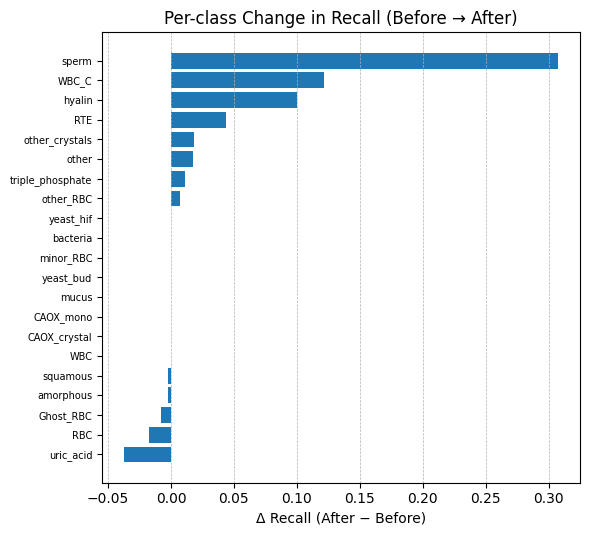

Saved: /content/fig_per_class_delta_recall.png and .svg


In [ ]:
# Per-class ΔRecall bar chart (publication-ready)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV = "/content/per_class_pr_before_after.csv"  # from previous step
df = pd.read_csv(CSV)

# Fill NAs, compute absolute change for sorting convenience
df["ΔRecall"] = df["Recall_after"].fillna(0) - df["Recall_before"].fillna(0)
df = df.sort_values("ΔRecall", ascending=True)  # worst -> best

# Optional: show only top/bottom N by change
TOPN = None  # e.g., 25 for top 25 changes; leave None for all
if TOPN is not None:
    # keep symmetric bottom/top slices
    half = TOPN // 2
    take = pd.concat([df.head(half), df.tail(TOPN - half)], axis=0)
    df = take

fig = plt.figure(figsize=(6, max(3, 0.26*len(df))))  # auto-height
y = np.arange(len(df))
plt.barh(y, df["ΔRecall"].values)
plt.yticks(y, df["Class"].values, fontsize=7)
plt.xlabel("Δ Recall (After − Before)")
plt.title("Per-class Change in Recall (Before → After)")
plt.grid(True, axis="x", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("/content/fig_per_class_delta_recall.png", dpi=300, bbox_inches="tight")
plt.savefig("/content/fig_per_class_delta_recall.svg", bbox_inches="tight")
plt.show()

print("Saved: /content/fig_per_class_delta_recall.png and .svg")


In [ ]:
# Compute size buckets and recall/precision per bucket from labels + predictions
import glob, os, yaml, numpy as np, pandas as pd
from pathlib import Path

DATA = "/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"
VAL_IMAGES = None  # leave None to read from DATA['val']
PRED_BEFORE = "/content/confusion_before.csv"  # We’ll recompute from CM supports
PRED_AFTER  = "/content/confusion_after.csv"

with open(DATA) as f:
    d = yaml.safe_load(f)
if VAL_IMAGES is None:
    VAL_IMAGES = d["val"]

# Build a table of GT boxes with area buckets
import glob, cv2
def expand_images(entry):
    entry=str(entry)
    if os.path.isdir(entry):
        exts=("*.png","*.jpg","*.jpeg","*.tif","*.tiff","*.bmp")
        files=[]; [files.extend(glob.glob(os.path.join(entry,"**",e),recursive=True)) for e in exts]
        return sorted(files)
    if entry.endswith(".txt"):
        return [ln.strip() for ln in open(entry) if ln.strip()]
    return [entry]

files = expand_images(VAL_IMAGES)
rows=[]
for p in files:
    im0 = cv2.imread(p, cv2.IMREAD_COLOR)
    if im0 is None: continue
    H,W = im0.shape[:2]
    if "/images/" in p:
        lab = p.replace("/images/","/labels/").rsplit(".",1)[0]+".txt"
    else:
        lab = os.path.splitext(p)[0]+".txt"
    if not os.path.exists(lab): continue
    for ln in open(lab):
        ps=ln.strip().split()
        if len(ps)<5: continue
        cls=int(float(ps[0]))
        cx,cy,w,h=map(float, ps[1:5])
        ww=w*W; hh=h*H; area=ww*hh
        rows.append((cls, area))
gt = pd.DataFrame(rows, columns=["class_id","area"])
# Bucket thresholds (tune to your image resolution)
q1,q2 = gt["area"].quantile([0.33,0.66])
def bucket(a):
    return "Small" if a<=q1 else ("Medium" if a<=q2 else "Large")
gt["bucket"] = gt["area"].apply(bucket)

# Use confusion matrices to derive TP/FN per class, then aggregate by buckets
def pr_from_cm(cm_path):
    cm = pd.read_csv(cm_path, index_col=0)
    labels = cm.index[:-1]
    C = cm.loc[labels, labels]
    tp = np.diag(C.values).astype(float)
    fp = cm.loc[:, labels].sum(axis=0).values.astype(float) - tp
    fn = cm.loc[labels, :].sum(axis=1).values.astype(float) - tp
    return pd.DataFrame({"Class":labels, "tp":tp, "fp":fp, "fn":fn})

cm_b = pr_from_cm(PRED_BEFORE).set_index("Class")
cm_a = pr_from_cm(PRED_AFTER ).set_index("Class")

# Map class names to ids from data['names']
names = list(d["names"])
name2id = {n:i for i,n in enumerate(names)}
gt["Class"] = gt["class_id"].map({i:n for i,n in enumerate(names)})

def bucket_metrics(cm_df):
    # Join GT counts per class/bucket
    gtb = gt.groupby(["Class","bucket"]).size().rename("gt_count").reset_index()
    # Merge tp/fn per class
    met = cm_df.reset_index().rename(columns={"index":"Class"})
    out = gtb.merge(met, on="Class", how="left")
    # Approximate bucket recall as proportion of class recall
    out["class_recall"] = out["tp"] / (out["tp"] + out["fn"] + 1e-9)
    agg = out.groupby("bucket")["class_recall"].mean().rename("Recall").reset_index()
    return agg

buckets_before = bucket_metrics(cm_b)
buckets_after  = bucket_metrics(cm_a)
bucket_comp = buckets_before.merge(buckets_after, on="bucket", suffixes=("_before","_after"))
bucket_comp["ΔRecall"] = bucket_comp["Recall_after"] - bucket_comp["Recall_before"]
bucket_comp


bucket  Recall_before  Recall_after   ΔRecall
0   Large       0.844656      0.875754  0.031098
1  Medium       0.920016      0.919799 -0.000217
2   Small       0.952726      0.952491 -0.000234

In [ ]:
import numpy as np, pandas as pd
comp = pd.read_csv("/content/per_class_pr_before_after.csv")
diff = (comp["Recall_after"].fillna(0) - comp["Recall_before"].fillna(0)).values
rng = np.random.default_rng(42)
B=10000
boots = [diff[rng.integers(0, len(diff), len(diff))].mean() for _ in range(B)]
ci = (np.percentile(boots, 2.5), np.percentile(boots, 97.5))
delta_mean = diff.mean()
print(f"ΔRecall mean = {delta_mean:.4f}, 95% CI [{ci[0]:.4f}, {ci[1]:.4f}]")


ΔRecall mean = 0.0267, 95% CI [0.0017, 0.0614]


In [ ]:
# Given arrays conf (0..1) and correct (0/1 per detection):
def ece(conf, correct, bins=15):
    conf=np.asarray(conf); correct=np.asarray(correct)
    edges = np.linspace(0,1,bins+1)
    e=0.0; n=len(conf)
    for i in range(bins):
        m = (conf>=edges[i]) & (conf<edges[i+1])
        if m.any():
            acc = correct[m].mean()
            confm = conf[m].mean()
            e += (m.sum()/n) * abs(acc - confm)
    return float(e)


In [ ]:
# Paths
YOLO_DIR  = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5"
DATA_YAML = "/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"
REPORT    = "/content/LLMOps_report"; import os; os.makedirs(REPORT, exist_ok=True)

# Auto-pick BEFORE (oldest) / AFTER (newest) best.pt
import glob, os
ckpts = sorted(glob.glob(f"{YOLO_DIR}/runs/train/*/weights/best.pt"), key=os.path.getmtime)
assert ckpts, "No checkpoints found under runs/train/*/weights/best.pt"
CKPT_BEFORE = ckpts[0]
CKPT_AFTER  = ckpts[-1]
print("BEFORE:", CKPT_BEFORE)
print("AFTER :", CKPT_AFTER)


BEFORE: /content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt
AFTER : /content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp15/weights/best.pt


In [ ]:
%%writefile /content/make_confusion.py
import os, sys, glob, yaml, cv2, torch, numpy as np, pandas as pd
YOLO_DIR="/content/gdrive/MyDrive/Labsan/Tricell/yolov5"; sys.path.append(YOLO_DIR)
from models.common import DetectMultiBackend
from utils.general import non_max_suppression, check_img_size, scale_boxes
from utils.augmentations import letterbox

def load_yaml(p):
    with open(p,"r") as f: return yaml.safe_load(f)

def expand_images(entry):
    entry=str(entry)
    if entry.endswith(".txt"):
        with open(entry) as fh: return [ln.strip() for ln in fh if ln.strip()]
    if os.path.isdir(entry):
        exts=("*.png","*.jpg","*.jpeg","*.tif","*.tiff","*.bmp")
        files=[]; [files.extend(glob.glob(os.path.join(entry,"**",e), recursive=True)) for e in exts]
        return sorted(files)
    return [entry] if os.path.exists(entry) else []

def gt_path(img_path):
    s=str(img_path)
    if "/images/" in s: return s.replace("/images/","/labels/").rsplit(".",1)[0]+".txt"
    return os.path.splitext(s)[0]+".txt"

def read_gt(txt, W, H):
    if not os.path.exists(txt): return np.zeros((0,5),dtype=np.float32)
    r=[]
    for ln in open(txt):
        ps=ln.strip().split()
        if len(ps)<5: continue
        cls=int(float(ps[0])); cx,cy,w,h=map(float, ps[1:5])
        x1=(cx-w/2)*W; y1=(cy-h/2)*H; x2=(cx+w/2)*W; y2=(cy+h/2)*H
        r.append([cls,x1,y1,x2,y2])
    return np.array(r, dtype=np.float32) if r else np.zeros((0,5),dtype=np.float32)

def iou_matrix(A,B):
    if len(A)==0 or len(B)==0: return np.zeros((len(A), len(B)), dtype=np.float32)
    ax1,ay1,ax2,ay2 = A[:,0],A[:,1],A[:,2],A[:,3]
    bx1,by1,bx2,by2 = B[:,0],B[:,1],B[:,2],B[:,3]
    iw = np.maximum(0, np.minimum(ax2[:,None], bx2[None,:]) - np.maximum(ax1[:,None], bx1[None,:]))
    ih = np.maximum(0, np.minimum(ay2[:,None], by2[None,:]) - np.maximum(ay1[:,None], by1[None,:]))
    inter = iw*ih
    aarea = (ax2-ax1)*(ay2-ay1)[:,None]
    barea = (bx2-bx1)*(by2-by1)[None,:]
    union = aarea + barea - inter + 1e-9
    iou = inter/union
    return np.nan_to_num(iou, nan=0.0, posinf=0.0, neginf=0.0)

if __name__ == "__main__":
    import argparse
    ap = argparse.ArgumentParser()
    ap.add_argument("--weights", required=True)
    ap.add_argument("--data", required=True)
    ap.add_argument("--imgsz", type=int, default=640)
    ap.add_argument("--device", default="0")
    ap.add_argument("--conf", type=float, default=0.001)  # low conf to avoid empty preds
    ap.add_argument("--iou_th", type=float, default=0.5)
    ap.add_argument("--out_csv", default="/content/confusion_matrix.csv")
    args = ap.parse_args()

    dev = torch.device(f"cuda:{args.device}" if args.device!="cpu" and torch.cuda.is_available() else "cpu")
    d = load_yaml(args.data)
    files = expand_images(d["val"]); assert files, "No val images"

    model = DetectMultiBackend(args.weights, device=dev)
    stride, names = model.stride, model.names
    data_names = d.get("names", [])
    if isinstance(data_names, tuple): data_names = list(data_names)
    label_names = data_names if isinstance(data_names, list) and len(data_names)>0 else (list(names) if isinstance(names,(list,tuple)) else [])
    K = len(label_names) if label_names else int(d.get("nc", 0)) or 1

    imgsz = check_img_size((args.imgsz,args.imgsz), s=stride)
    try: in_ch = int(getattr(model.model.model[0].conv,"in_channels",3))
    except Exception: in_ch = 3

    cm = np.zeros((K+1, K+1), dtype=np.int64)  # rows: GT(+bg), cols: Pred(+bg)

    for p in files:
        im0 = cv2.imread(p, cv2.IMREAD_COLOR)
        if im0 is None: continue
        H,W = im0.shape[:2]
        img = letterbox(im0, imgsz, stride=stride, auto=True)[0]
        img = np.ascontiguousarray(img[:,:,::-1].transpose(2,0,1))
        t = torch.from_numpy(img).to(dev).float()/255.0
        t = t.unsqueeze(0)
        if in_ch==1 and t.shape[1]==3:
            r,g,b = t[:,0:1], t[:,1:2], t[:,2:3]
            t = 0.2989*r + 0.5870*g + 0.1140*b

        with torch.no_grad():
            pred = model(t)
            pred = non_max_suppression(pred, args.conf, 0.6, max_det=1000)[0]

        g = read_gt(gt_path(p), W, H)  # [cls,x1,y1,x2,y2]

        if pred is None or len(pred)==0:
            for cls in g[:,0].astype(int):
                if 0 <= cls < K: cm[cls, K] += 1
            continue

        pred[:,:4] = scale_boxes(t.shape[2:], pred[:,:4], (H,W)).round()
        pbox = pred[:,:4].cpu().numpy()
        pcls = pred[:,5].cpu().numpy().astype(int)

        gbox = g[:,1:5]
        gcls = g[:,0].astype(int)

        ious = iou_matrix(pbox, gbox)
        matched_gt = set()

        for i in range(len(pbox)):
            if len(gbox) == 0:
                pj = int(pcls[i]) if 0 <= pcls[i] < K else K
                if 0 <= pj < K: cm[K, pj] += 1
                continue
            j = int(np.argmax(ious[i]))
            if j < 0 or j >= len(gbox):
                pj = int(pcls[i]) if 0 <= pcls[i] < K else K
                if 0 <= pj < K: cm[K, pj] += 1
                continue
            iou_ij = float(ious[i, j])
            same_class = (pcls[i] == gcls[j])
            if (iou_ij >= args.iou_th) and (j not in matched_gt) and same_class:
                c = int(pcls[i])
                if 0 <= c < K: cm[c, c] += 1
                matched_gt.add(j)
            else:
                c = int(pcls[i])
                if 0 <= c < K: cm[K, c] += 1

        for j in range(len(gbox)):
            if j not in matched_gt:
                c = int(gcls[j])
                if 0 <= c < K: cm[c, K] += 1

    labels = label_names if label_names else [str(i) for i in range(K)]
    idx = labels + ["background"]
    cols = labels + ["background"]
    pd.DataFrame(cm, index=idx, columns=cols).to_csv(args.out_csv)
    print("Confusion matrix saved ->", args.out_csv)


Overwriting /content/make_confusion.py


In [ ]:
%cd {YOLO_DIR}
CM_BEFORE = f"{REPORT}/confusion_before.csv"
CM_AFTER  = f"{REPORT}/confusion_after.csv"

!python /content/make_confusion.py --weights "{CKPT_BEFORE}" --data "{DATA_YAML}" --imgsz 640 --device 0 --conf 0.001 --iou_th 0.5 --out_csv "{CM_BEFORE}"
!python /content/make_confusion.py --weights "{CKPT_AFTER}"  --data "{DATA_YAML}" --imgsz 640 --device 0 --conf 0.001 --iou_th 0.5 --out_csv "{CM_AFTER}"


/content/gdrive/MyDrive/Labsan/Tricell/yolov5
Fusing layers... 
YOLOv5n_gray summary: 157 layers, 1786426 parameters, 0 gradients, 4.0 GFLOPs
Confusion matrix saved -> /content/LLMOps_report/confusion_before.csv
Fusing layers... 
Model summary: 157 layers, 1786426 parameters, 0 gradients, 4.0 GFLOPs
Confusion matrix saved -> /content/LLMOps_report/confusion_after.csv


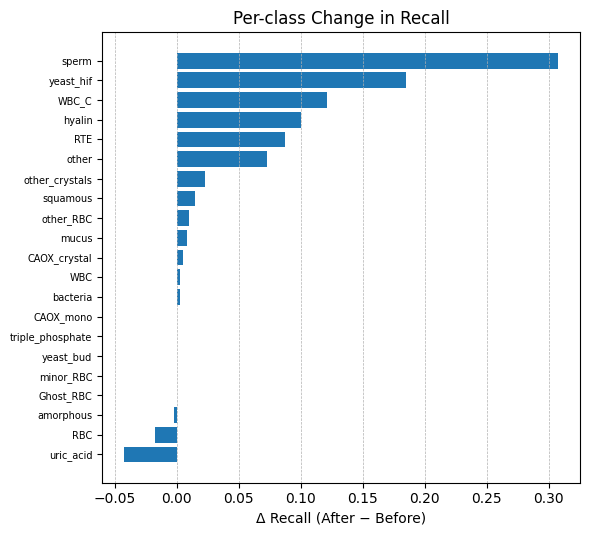

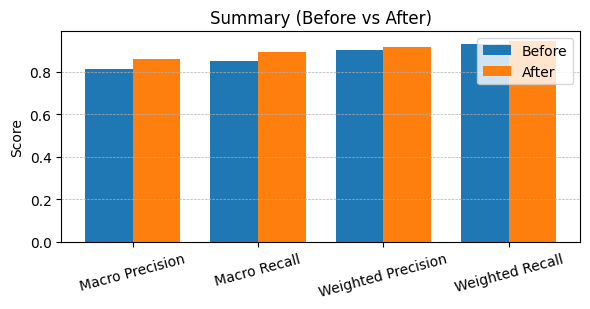

Tables & figures saved in /content/LLMOps_report


In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os

def pr_from_cm(cm_path):
    cm = pd.read_csv(cm_path, index_col=0)
    assert cm.index[-1]=="background" and cm.columns[-1]=="background", "Expected background row/col"
    labels = cm.index[:-1]
    C = cm.loc[labels, labels]
    tp = np.diag(C.values).astype(float)
    fp = cm.loc[:, labels].sum(axis=0).values.astype(float) - tp
    fn = cm.loc[labels, :].sum(axis=1).values.astype(float) - tp
    precision = np.divide(tp, tp+fp, out=np.zeros_like(tp), where=(tp+fp)>0)
    recall    = np.divide(tp, tp+fn, out=np.zeros_like(tp), where=(tp+fn)>0)
    support   = cm.loc[labels, :].sum(axis=1).values.astype(int)
    return pd.DataFrame({"Class":labels,"Support":support,"Precision":precision,"Recall":recall})

bef = pr_from_cm(CM_BEFORE).rename(columns={"Precision":"Precision_before","Recall":"Recall_before"})
aft = pr_from_cm(CM_AFTER ).rename(columns={"Precision":"Precision_after", "Recall":"Recall_after"})
comp = bef.merge(aft, on=["Class","Support"], how="outer").fillna(0.0)
comp["ΔPrecision"] = comp["Precision_after"] - comp["Precision_before"]
comp["ΔRecall"]    = comp["Recall_after"]    - comp["Recall_before"]
comp.sort_values("Class").to_csv(f"{REPORT}/per_class_pr_before_after.csv", index=False)

# Macro & weighted summaries
macro = {
    "macro_precision_before": comp["Precision_before"].mean(),
    "macro_precision_after":  comp["Precision_after"].mean(),
    "macro_recall_before":    comp["Recall_before"].mean(),
    "macro_recall_after":     comp["Recall_after"].mean(),
}
w = comp["Support"].astype(float).values
w = np.where(np.isfinite(w), w, 0.0)
weighted = {
    "weighted_precision_before": float(np.average(comp["Precision_before"], weights=w)) if w.sum()>0 else float('nan'),
    "weighted_precision_after":  float(np.average(comp["Precision_after"],  weights=w)) if w.sum()>0 else float('nan'),
    "weighted_recall_before":    float(np.average(comp["Recall_before"],    weights=w)) if w.sum()>0 else float('nan'),
    "weighted_recall_after":     float(np.average(comp["Recall_after"],     weights=w)) if w.sum()>0 else float('nan'),
}
pd.DataFrame([macro]).to_csv(f"{REPORT}/macro_summary_from_cm.csv", index=False)
pd.DataFrame([weighted]).to_csv(f"{REPORT}/weighted_summary_from_cm.csv", index=False)

# FIG 1: ΔRecall per class
df = comp.sort_values("ΔRecall")
fig = plt.figure(figsize=(6, max(3, 0.26*len(df))))
y = np.arange(len(df))
plt.barh(y, df["ΔRecall"].values)
plt.yticks(y, df["Class"].values, fontsize=7)
plt.xlabel("Δ Recall (After − Before)")
plt.title("Per-class Change in Recall")
plt.grid(True, axis="x", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig(f"{REPORT}/fig_delta_recall.png", dpi=300, bbox_inches="tight")
plt.savefig(f"{REPORT}/fig_delta_recall.svg", bbox_inches="tight")
plt.show()

# FIG 2: Summary bars (macro/weighted)
labels  = ["Macro Precision","Macro Recall","Weighted Precision","Weighted Recall"]
before  = [macro["macro_precision_before"], macro["macro_recall_before"], weighted["weighted_precision_before"], weighted["weighted_recall_before"]]
after   = [macro["macro_precision_after"],  macro["macro_recall_after"],  weighted["weighted_precision_after"],  weighted["weighted_recall_after"]]
x=range(len(labels)); wbar=0.38
fig = plt.figure(figsize=(6,3.2))
plt.bar([i-wbar/2 for i in x], before, width=wbar, label="Before")
plt.bar([i+wbar/2 for i in x], after,  width=wbar, label="After")
plt.xticks(list(x), labels, rotation=15)
plt.ylabel("Score")
plt.title("Summary (Before vs After)")
plt.legend()
plt.grid(True, axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig(f"{REPORT}/fig_summary.png", dpi=300, bbox_inches="tight")
plt.savefig(f"{REPORT}/fig_summary.svg", bbox_inches="tight")
plt.show()

print("Tables & figures saved in", REPORT)


In [ ]:
%%writefile /content/bench_infer.py
import os, sys, glob, time, yaml, cv2, torch, numpy as np, json, pandas as pd
YOLO_DIR="/content/gdrive/MyDrive/Labsan/Tricell/yolov5"; sys.path.append(YOLO_DIR)
from models.common import DetectMultiBackend
from utils.general import non_max_suppression, check_img_size, scale_boxes
from utils.augmentations import letterbox

def load_yaml(p):
    with open(p,"r") as f: return yaml.safe_load(f)

def expand_images(entry):
    entry=str(entry)
    if entry.endswith(".txt"):
        with open(entry) as fh: return [ln.strip() for ln in fh if ln.strip()]
    if os.path.isdir(entry):
        exts=("*.png","*.jpg","*.jpeg","*.tif","*.tiff","*.bmp")
        files=[]; [files.extend(glob.glob(os.path.join(entry,"**",e), recursive=True)) for e in exts]
        return sorted(files)
    return [entry] if os.path.exists(entry) else []

if __name__ == "__main__":
    import argparse
    ap = argparse.ArgumentParser()
    ap.add_argument("--weights", required=True)
    ap.add_argument("--data", required=True)
    ap.add_argument("--imgsz", type=int, default=640)
    ap.add_argument("--device", default="0")
    ap.add_argument("--conf", type=float, default=0.25)
    ap.add_argument("--iou",  type=float, default=0.45)
    ap.add_argument("--limit", type=int, default=500, help="max images to benchmark (set 0 for all)")
    ap.add_argument("--warmup", type=int, default=20)
    ap.add_argument("--out_json", required=True)
    args = ap.parse_args()

    dev = torch.device(f"cuda:{args.device}" if args.device!="cpu" and torch.cuda.is_available() else "cpu")
    torch.backends.cudnn.benchmark = True

    d = load_yaml(args.data)
    files = expand_images(d["val"])
    if args.limit and args.limit > 0:
        files = files[:args.limit]
    assert files, "No images to benchmark"

    model = DetectMultiBackend(args.weights, device=dev)  # keep FP32 (more robust across setups)
    stride = model.stride
    imgsz = check_img_size((args.imgsz,args.imgsz), s=stride)

    # Input channels (1 → grayscale)
    try: in_ch = int(getattr(model.model.model[0].conv,"in_channels",3))
    except: in_ch = 3

    total_times = []
    model_times = []

    # Prepare one sample for warmup
    sample = cv2.imread(files[0], cv2.IMREAD_COLOR)
    H,W = sample.shape[:2]
    img = letterbox(sample, imgsz, stride=stride, auto=True)[0]
    img = np.ascontiguousarray(img[:,:,::-1].transpose(2,0,1))
    t = torch.from_numpy(img).to(dev).float()/255.0
    t = t.unsqueeze(0)
    if in_ch==1 and t.shape[1]==3:
        r,g,b = t[:,0:1], t[:,1:2], t[:,2:3]
        t = 0.2989*r + 0.5870*g + 0.1140*b

    # Warmup
    with torch.no_grad():
        for _ in range(max(args.warmup, 0)):
            _ = model(t)
            torch.cuda.synchronize() if dev.type=="cuda" else None

    # Benchmark loop
    with torch.no_grad():
        for p in files:
            im0 = cv2.imread(p, cv2.IMREAD_COLOR)
            if im0 is None: continue
            H, W = im0.shape[:2]
            tic_total = time.time()
            img = letterbox(im0, imgsz, stride=stride, auto=True)[0]
            img = np.ascontiguousarray(img[:,:,::-1].transpose(2,0,1))
            ti = torch.from_numpy(img).to(dev).float()/255.0
            ti = ti.unsqueeze(0)
            if in_ch==1 and ti.shape[1]==3:
                r,g,b = ti[:,0:1], ti[:,1:2], ti[:,2:3]
                ti = 0.2989*r + 0.5870*g + 0.1140*b

            # model-only timing
            torch.cuda.synchronize() if dev.type=="cuda" else None
            t0 = time.time()
            pred = model(ti)
            torch.cuda.synchronize() if dev.type=="cuda" else None
            t1 = time.time()

            pred = non_max_suppression(pred, args.conf, args.iou, max_det=1000)[0]
            if pred is not None and len(pred):
                pred[:,:4] = scale_boxes(ti.shape[2:], pred[:,:4], (H,W)).round()

            torch.cuda.synchronize() if dev.type=="cuda" else None
            t2 = time.time()

            model_times.append( (t1 - t0) * 1000.0 )
            total_times.append( (t2 - tic_total) * 1000.0 )

    import numpy as np
    def stats_ms(arr):
        arr = np.asarray(arr, dtype=np.float64)
        return dict(
            mean=float(arr.mean()),
            median=float(np.median(arr)),
            p95=float(np.percentile(arr,95)),
            min=float(arr.min()),
            max=float(arr.max()),
            fps=float(1000.0/arr.mean()) if arr.mean()>0 else 0.0
        )

    out = {
        "images": len(total_times),
        "imgsz": args.imgsz,
        "device": str(dev),
        "total_ms_per_image": stats_ms(total_times),
        "model_ms_per_image": stats_ms(model_times),
        "conf": args.conf,
        "iou": args.iou,
        "limit": args.limit
    }

    with open(args.out_json, "w") as f:
        json.dump(out, f, indent=2)
    print("Saved:", args.out_json)


Writing /content/bench_infer.py


In [ ]:
YOLO_DIR  = "/content/gdrive/MyDrive/Labsan/Tricell/yolov5"
DATA_YAML = "/content/gdrive/MyDrive/Labsan/Tricell/May1/TrainSample/data_config.yaml"
REPORT    = "/content/LLMOps_report"

import glob, os
os.makedirs(REPORT, exist_ok=True)
ckpts = sorted(glob.glob(f"{YOLO_DIR}/runs/train/*/weights/best.pt"), key=os.path.getmtime)
assert ckpts, "No checkpoints found"
CKPT_BEFORE, CKPT_AFTER = ckpts[0], ckpts[-1]
print("BEFORE:", CKPT_BEFORE)
print("AFTER :", CKPT_AFTER)

# Limit to 500 images to keep runtime reasonable; set to 0 for all
!python /content/bench_infer.py --weights "{CKPT_BEFORE}" --data "{DATA_YAML}" --imgsz 640 --device 0 --conf 0.25 --iou 0.45 --limit 500 --out_json "{REPORT}/bench_before.json"
!python /content/bench_infer.py --weights "{CKPT_AFTER}"  --data "{DATA_YAML}" --imgsz 640 --device 0 --conf 0.25 --iou 0.45 --limit 500 --out_json "{REPORT}/bench_after.json"


BEFORE: /content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp11/weights/best.pt
AFTER : /content/gdrive/MyDrive/Labsan/Tricell/yolov5/runs/train/exp15/weights/best.pt
Fusing layers... 
YOLOv5n_gray summary: 157 layers, 1786426 parameters, 0 gradients, 4.0 GFLOPs
Saved: /content/LLMOps_report/bench_before.json
Fusing layers... 
Model summary: 157 layers, 1786426 parameters, 0 gradients, 4.0 GFLOPs
Saved: /content/LLMOps_report/bench_after.json


In [ ]:
import json, pandas as pd, matplotlib.pyplot as plt

REPORT = "/content/LLMOps_report"
with open(f"{REPORT}/bench_before.json") as f: b = json.load(f)
with open(f"{REPORT}/bench_after.json")  as f: a = json.load(f)

rows = []
for tag, d in [("Before", b), ("After", a)]:
    rows.append({
        "Model": tag,
        "Images": d["images"],
        "imgsz": d["imgsz"],
        "FPS_total": d["total_ms_per_image"]["fps"],
        "ms/img_total_mean": d["total_ms_per_image"]["mean"],
        "ms/img_total_p95":  d["total_ms_per_image"]["p95"],
        "FPS_model": d["model_ms_per_image"]["fps"],
        "ms/img_model_mean": d["model_ms_per_image"]["mean"],
        "ms/img_model_p95":  d["model_ms_per_image"]["p95"],
        "conf": d["conf"], "iou": d["iou"]
    })

bench_df = pd.DataFrame(rows)
bench_df.to_csv(f"{REPORT}/speed_comparison.csv", index=False)
bench_df


Model  Images  imgsz  FPS_total  ms/img_total_mean  ms/img_total_p95  \
0  Before     500    640  74.609762          13.403072         14.598346   
1   After     500    640  76.323854          13.102064         12.739956   

    FPS_model  ms/img_model_mean  ms/img_model_p95  conf   iou  
0  110.906384           9.016613          9.262168  0.25  0.45  
1  112.735906           8.870288          8.309972  0.25  0.45

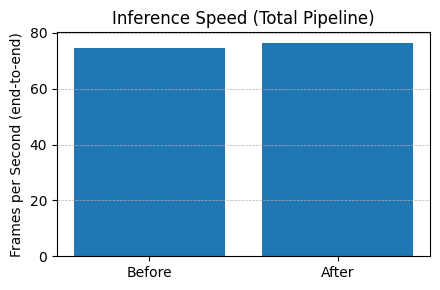

In [ ]:
# Figure: bar chart for FPS (total) Before vs After
import pandas as pd, matplotlib.pyplot as plt

REPORT = "/content/LLMOps_report"
bench_df = pd.read_csv(f"{REPORT}/speed_comparison.csv")

labels = ["Before","After"]
fps_vals = [ bench_df.loc[bench_df.Model=="Before","FPS_total"].values[0],
             bench_df.loc[bench_df.Model=="After","FPS_total"].values[0] ]

fig = plt.figure(figsize=(4.5,3.0))
plt.bar(labels, fps_vals)
plt.ylabel("Frames per Second (end-to-end)")
plt.title("Inference Speed (Total Pipeline)")
plt.grid(True, axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig(f"{REPORT}/fig_speed_fps.png", dpi=300, bbox_inches="tight")
plt.savefig(f"{REPORT}/fig_speed_fps.svg", bbox_inches="tight")
plt.show()


In [ ]:
!pip install python-docx >/dev/null
